In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot') # Choice of style 'ggplot' 

# Make plot for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') 

In [19]:
pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

In [20]:
col_description = pd.read_csv('data/HomeCredit_columns_description.csv',
                              index_col=0,encoding='cp1252')

def col_name(name, col_description=col_description):
    values = col_description[col_description['Row'] == name]['Description'].values
    print(name + ': \n')
    for i in values:
        print (i+'\n')
    table = col_description[col_description['Row'] == name]['Table'].values
    print('Table: {}\n'.format(table))

In [65]:
def plot_data(col_name, df, numeric=True):
    if numeric:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        sns.boxplot(df[col_name], ax=ax1)
        sns.distplot(df[col_name].dropna(), ax=ax2)
        plt.show();
    else:
        plt.figure(figsize=(10,4))
        sns.countplot(x=col_name, data=df, orient='h',
                      order=df[col_name].value_counts(1).index, alpha=.7)
        plt.show();

In [22]:
ls data/

HomeCredit_columns_description.csv  bureau_balance.csv.zip
POS_CASH_balance.csv.zip            credit_card_balance.csv.zip
application_test.csv.zip            installments_payments.csv.zip
application_train.csv.zip           previous_application.csv.zip
bureau.csv.zip                      sample_submission.csv.zip


In [68]:
def wrap_func(df):
    # checking missing data
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_df.head(10))
    
    # checking number of categorical and numeric features
    print(df.dtypes.value_counts())
    
    # build numeric feature data summary
    num_cols = df._get_numeric_data().columns
    numeric_cols = []
    
    for col in num_cols:
        if len(df[col].unique())>20:
            numeric_cols.append(col)
            col_name(col, col_description)
            print('Missing values:\n{}'.format(missing_df.loc[col,:]) + '\n')
            print(df[col].describe().T)
            plot_data(col, df)

    # build categorical feature data summary
    
    cat_cols = set(df.columns) - set(numeric_cols)
    for col in cat_cols:
        col_name(col, col_description)
        pct = df[col].value_counts(1)
        cnt = df[col].value_counts()
        cnt_table = pd.concat([pct, cnt], axis=1, keys=['Percent', 'Total'])
        print('Missing values:\n{}'.format(missing_df.loc[col,:]) + '\n')
        print(cnt_table)
        plot_data(col, df, numeric=False)

                             Total    Percent
RATE_INTEREST_PRIMARY      1664263  99.643698
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_DOWN_PAYMENT           895844  53.636480
AMT_DOWN_PAYMENT            895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
DAYS_TERMINATION            673065  40.298129
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
object     16
float64    15
int64       4
dtype: int64
AMT_ANNUITY: 

Loan annuity

Annuity of the Credit Bureau credit

Annuity of previous application

Table: ['application_{train|test}.csv' 'bureau.csv' 'previous_application.csv']

Missing values:
Total      372235.000000
Percent        22.286665
Name: AMT_ANNUITY, dtype: float64

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max 

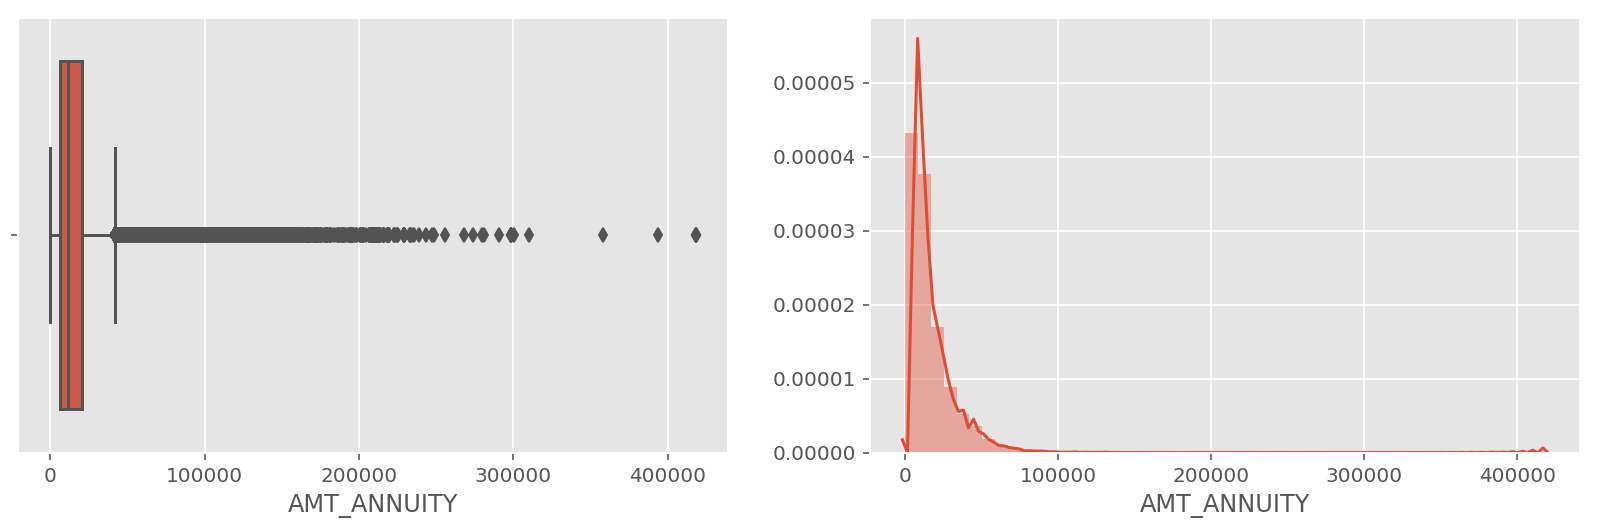

AMT_APPLICATION: 

For how much credit did client ask on the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_APPLICATION, dtype: float64

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


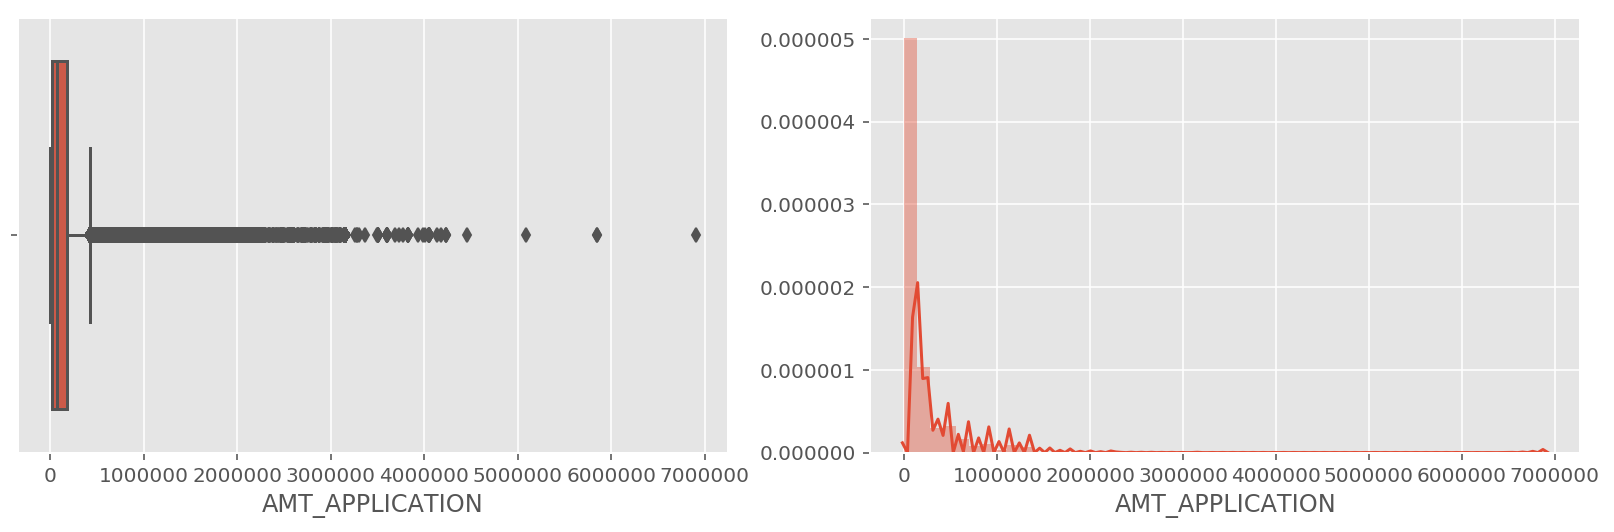

AMT_CREDIT: 

Credit amount of the loan

Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      1.00000
Percent    0.00006
Name: AMT_CREDIT, dtype: float64

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


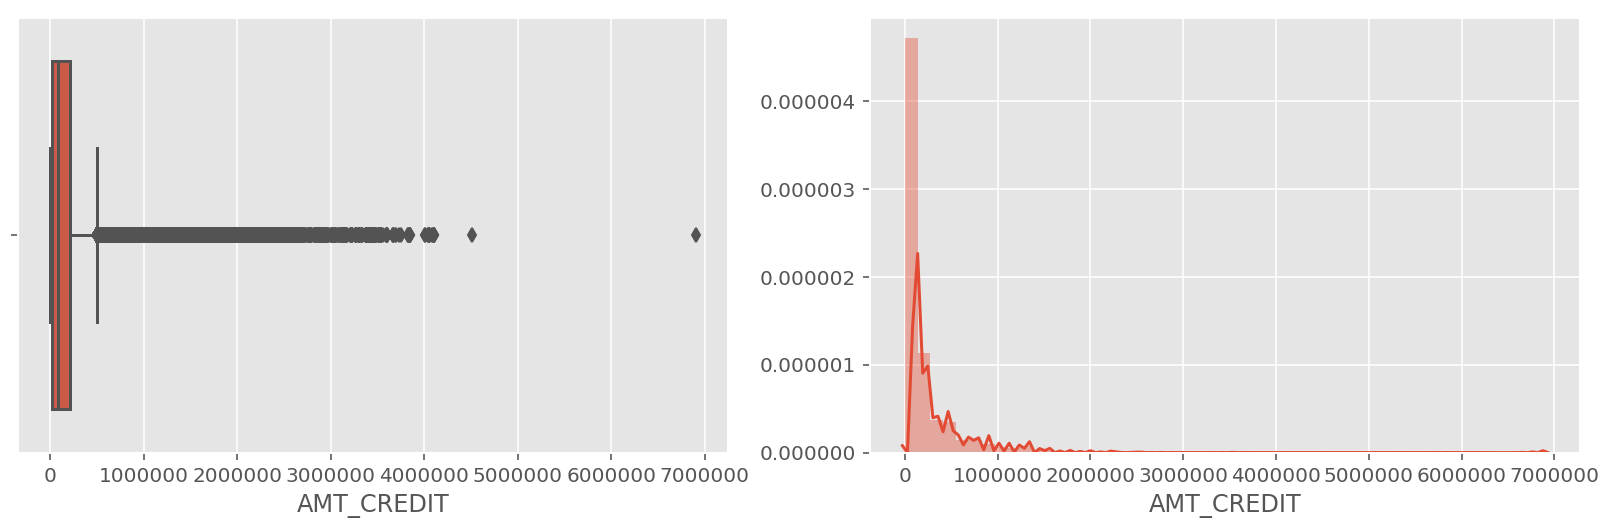

AMT_DOWN_PAYMENT: 

Down payment on the previous application

Table: ['previous_application.csv']

Missing values:
Total      895844.00000
Percent        53.63648
Name: AMT_DOWN_PAYMENT, dtype: float64

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64


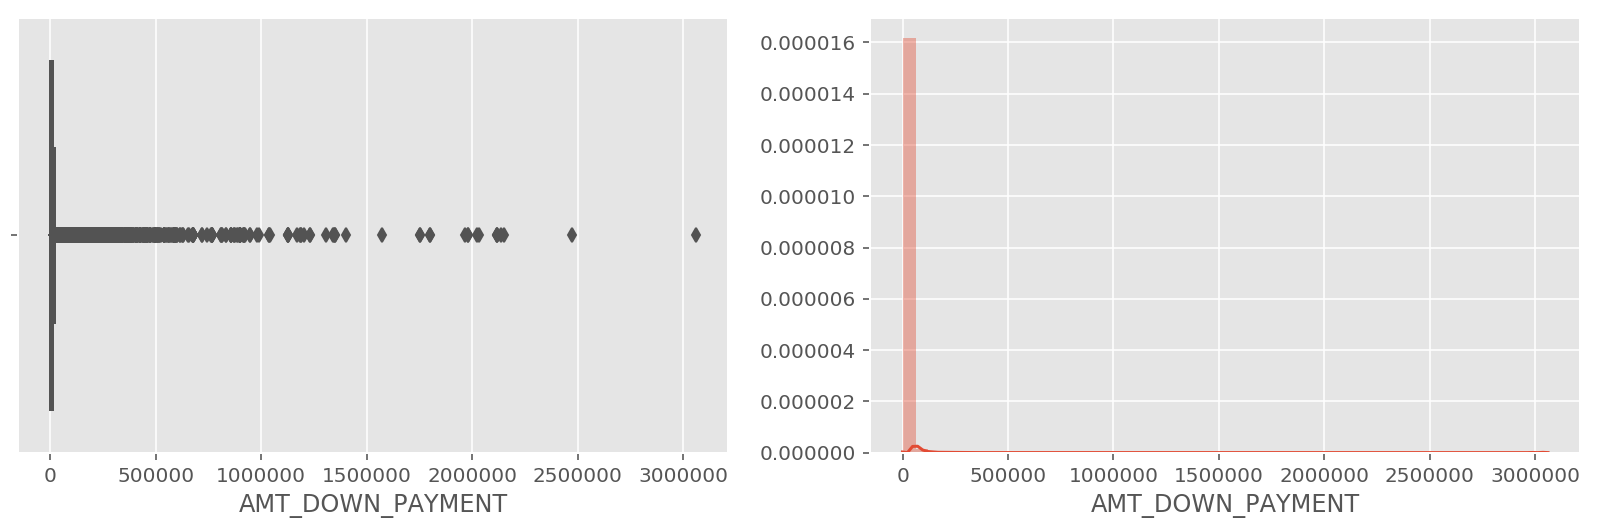

AMT_GOODS_PRICE: 

For consumer loans it is the price of the goods for which the loan is given

Goods price of good that client asked for (if applicable) on the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      385515.000000
Percent        23.081773
Name: AMT_GOODS_PRICE, dtype: float64

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


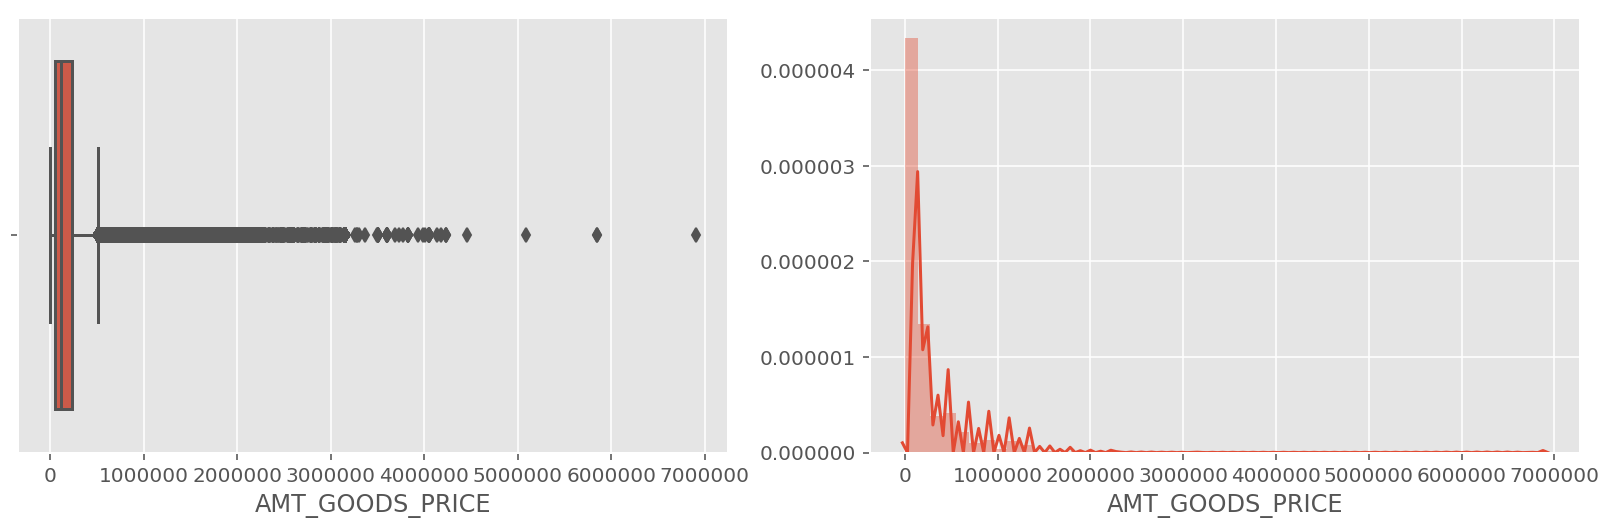

HOUR_APPR_PROCESS_START: 

Approximately at what hour did the client apply for the loan

Approximately at what day hour did the client apply for the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: HOUR_APPR_PROCESS_START, dtype: float64

count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


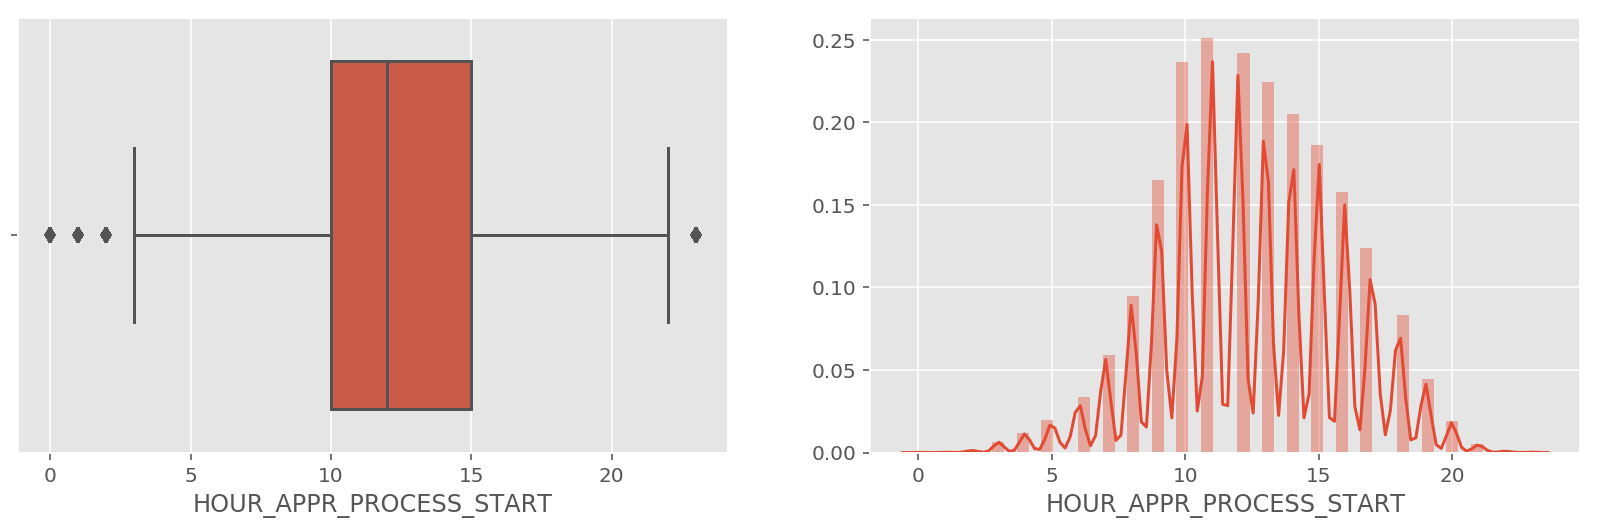

RATE_DOWN_PAYMENT: 

Down payment rate normalized on previous credit

Table: ['previous_application.csv']

Missing values:
Total      895844.00000
Percent        53.63648
Name: RATE_DOWN_PAYMENT, dtype: float64

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64


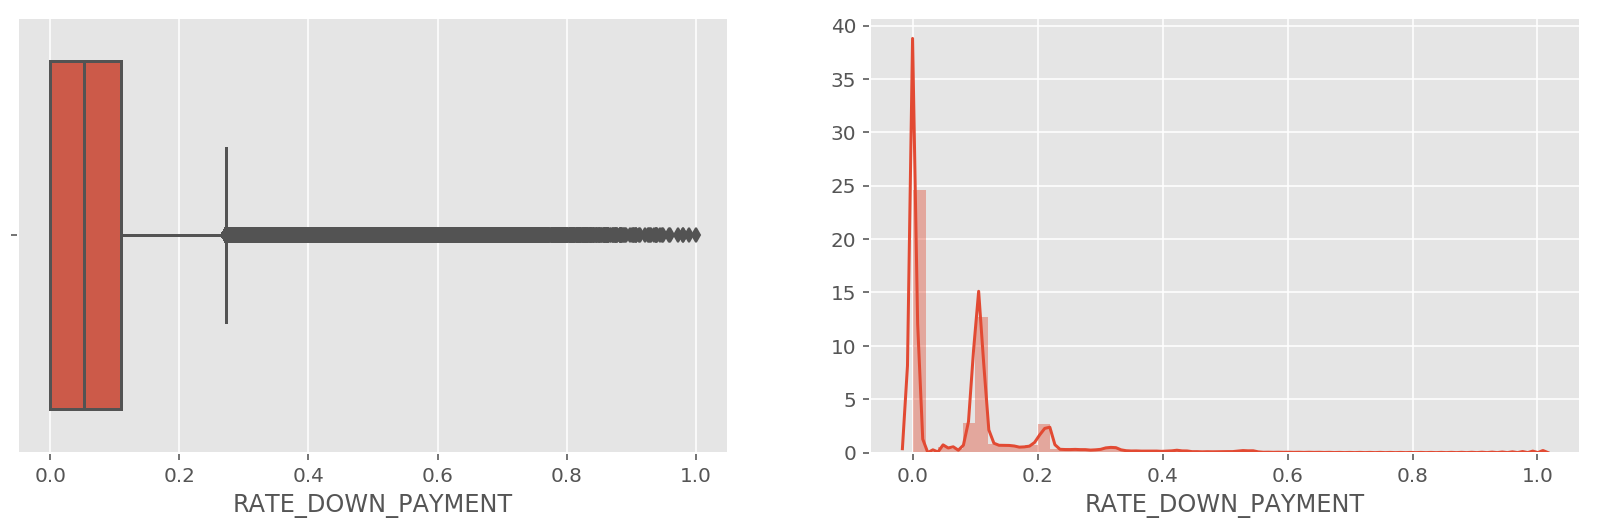

RATE_INTEREST_PRIMARY: 

Interest rate normalized on previous credit

Table: ['previous_application.csv']

Missing values:
Total      1.664263e+06
Percent    9.964370e+01
Name: RATE_INTEREST_PRIMARY, dtype: float64

count    5951.000000
mean        0.188357
std         0.087671
min         0.034781
25%         0.160716
50%         0.189122
75%         0.193330
max         1.000000
Name: RATE_INTEREST_PRIMARY, dtype: float64


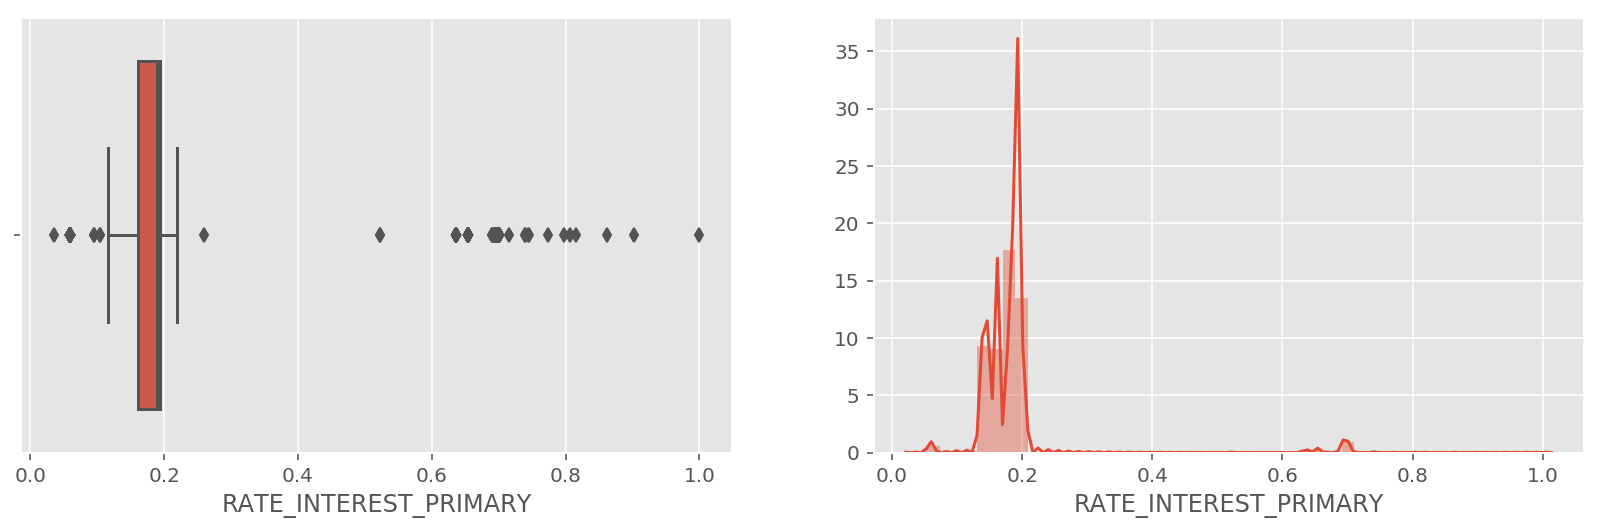

RATE_INTEREST_PRIVILEGED: 

Interest rate normalized on previous credit

Table: ['previous_application.csv']

Missing values:
Total      1.664263e+06
Percent    9.964370e+01
Name: RATE_INTEREST_PRIVILEGED, dtype: float64

count    5951.000000
mean        0.773503
std         0.100879
min         0.373150
25%         0.715645
50%         0.835095
75%         0.852537
max         1.000000
Name: RATE_INTEREST_PRIVILEGED, dtype: float64


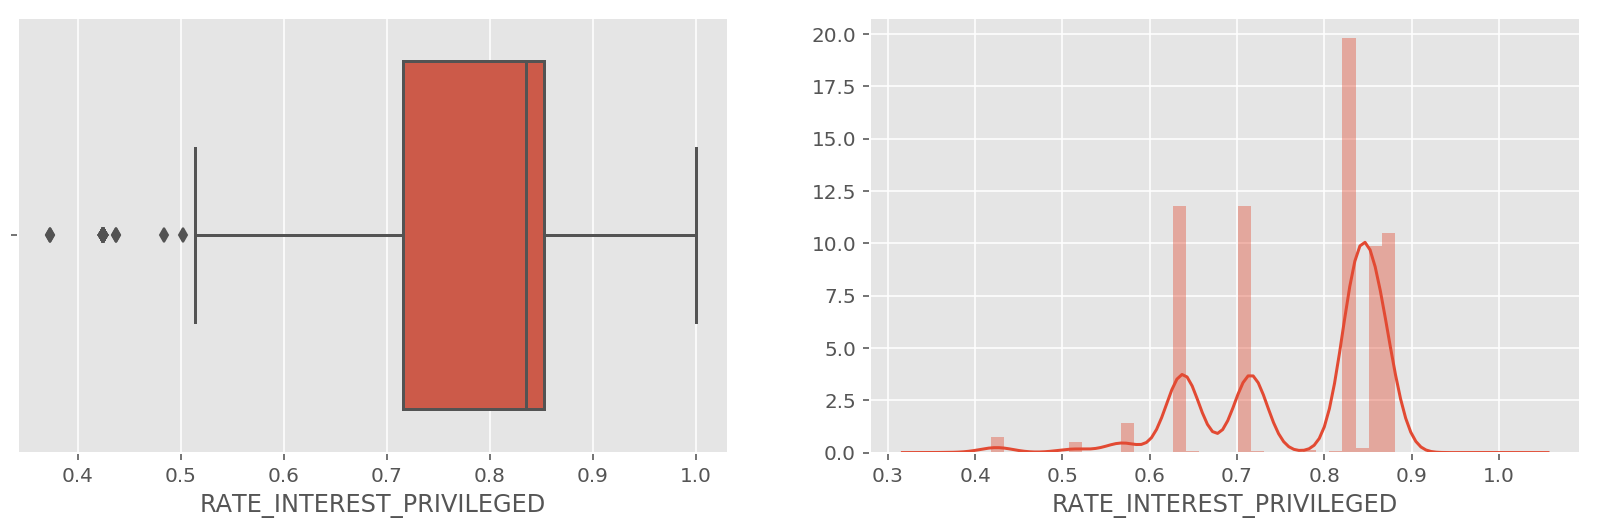

DAYS_DECISION: 

Relative to current application when was the decision about previous application made

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_DECISION, dtype: float64

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64


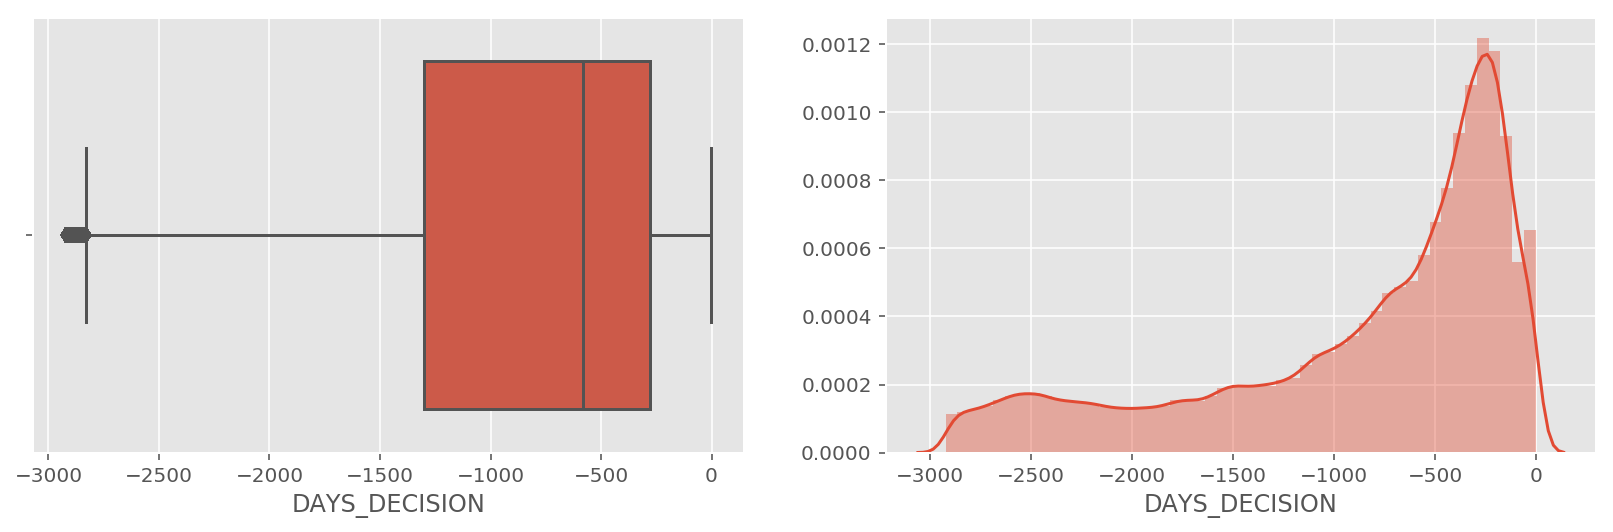

SELLERPLACE_AREA: 

Selling area of seller place of the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: SELLERPLACE_AREA, dtype: float64

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


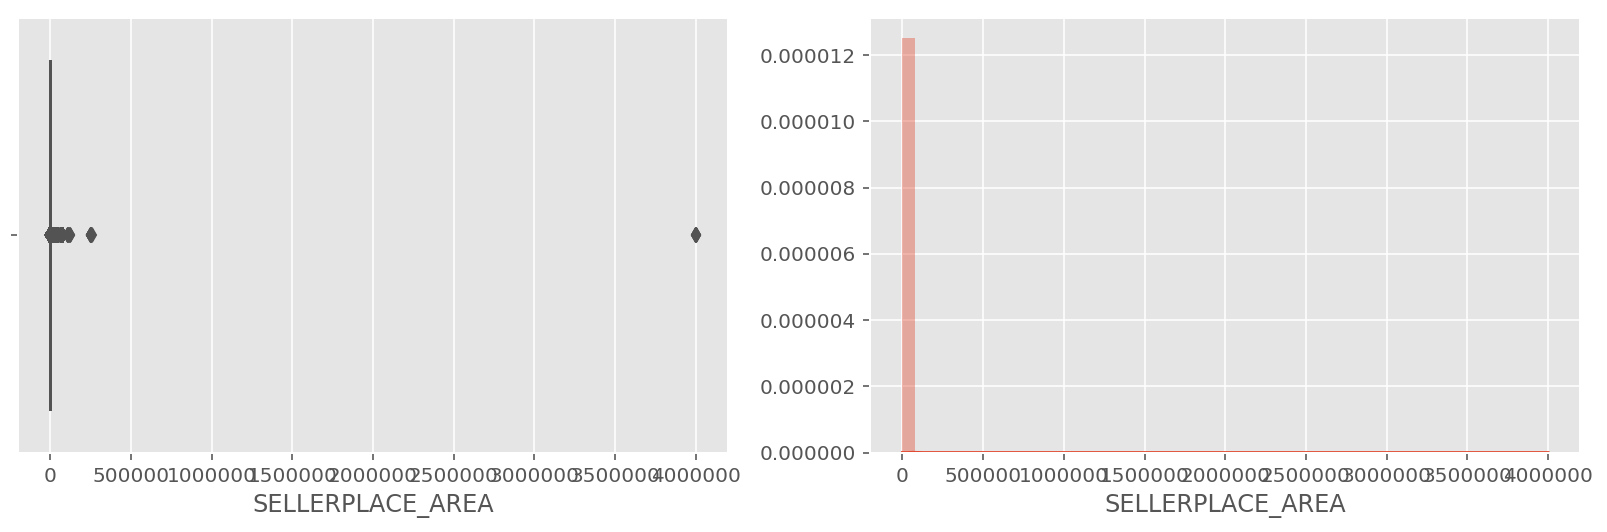

CNT_PAYMENT: 

Term of previous credit at application of the previous application

Table: ['previous_application.csv']

Missing values:
Total      372230.000000
Percent        22.286366
Name: CNT_PAYMENT, dtype: float64

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


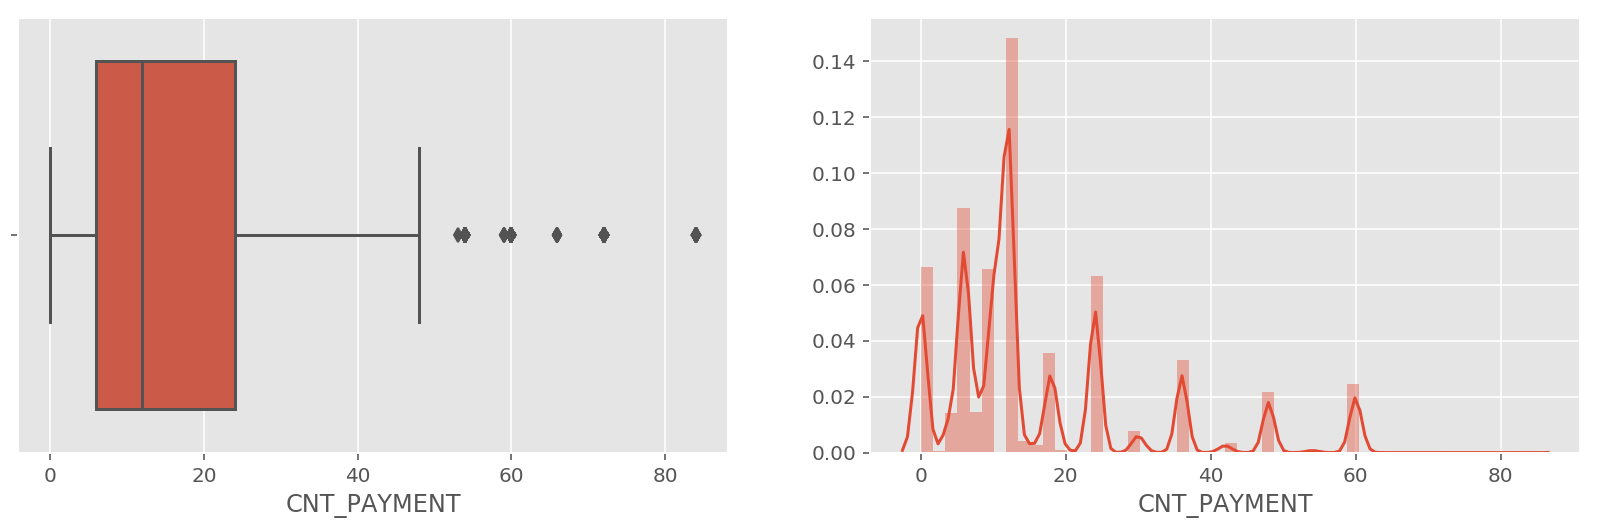

DAYS_FIRST_DRAWING: 

Relative to application date of current application when was the first disbursement of the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: DAYS_FIRST_DRAWING, dtype: float64

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


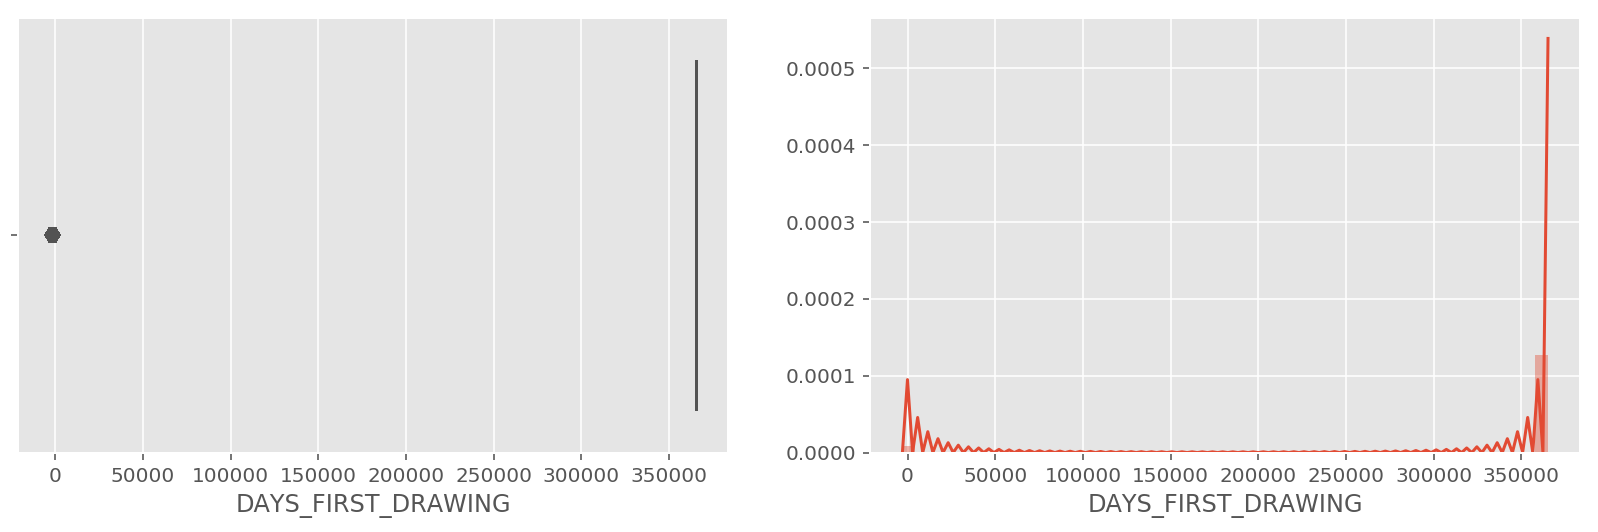

DAYS_FIRST_DUE: 

Relative to application date of current application when was the first due supposed to be of the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: DAYS_FIRST_DUE, dtype: float64

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


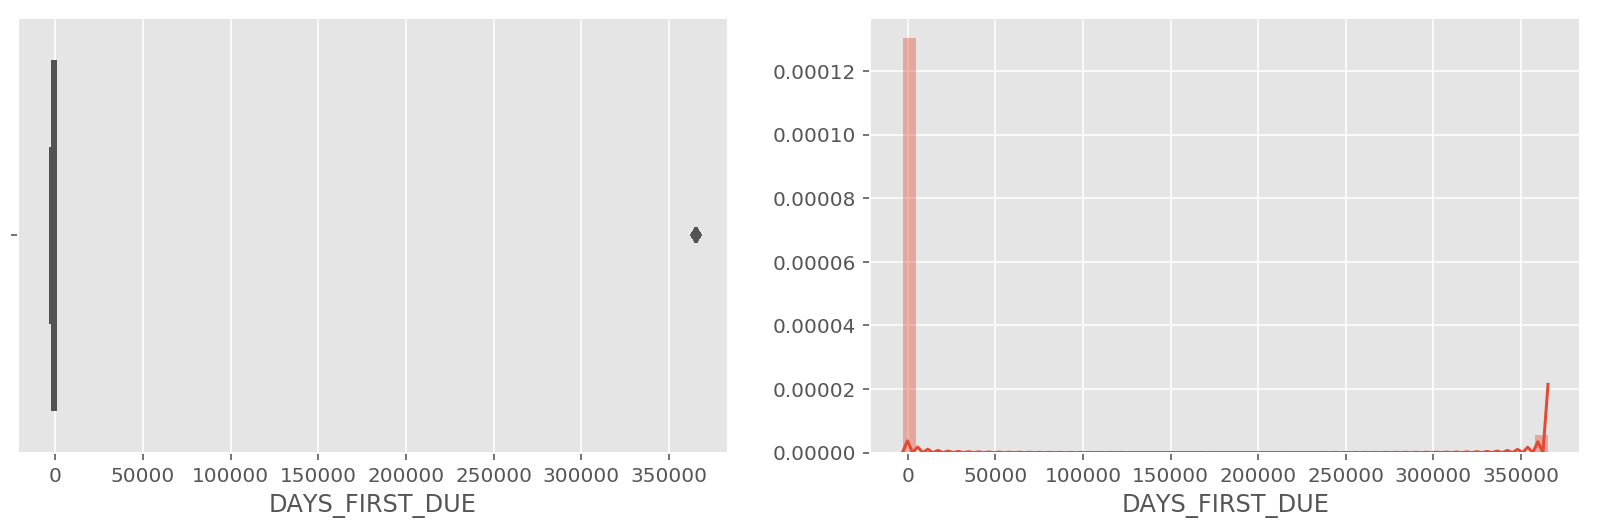

DAYS_LAST_DUE_1ST_VERSION: 

Relative to application date of current application when was the first due of the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


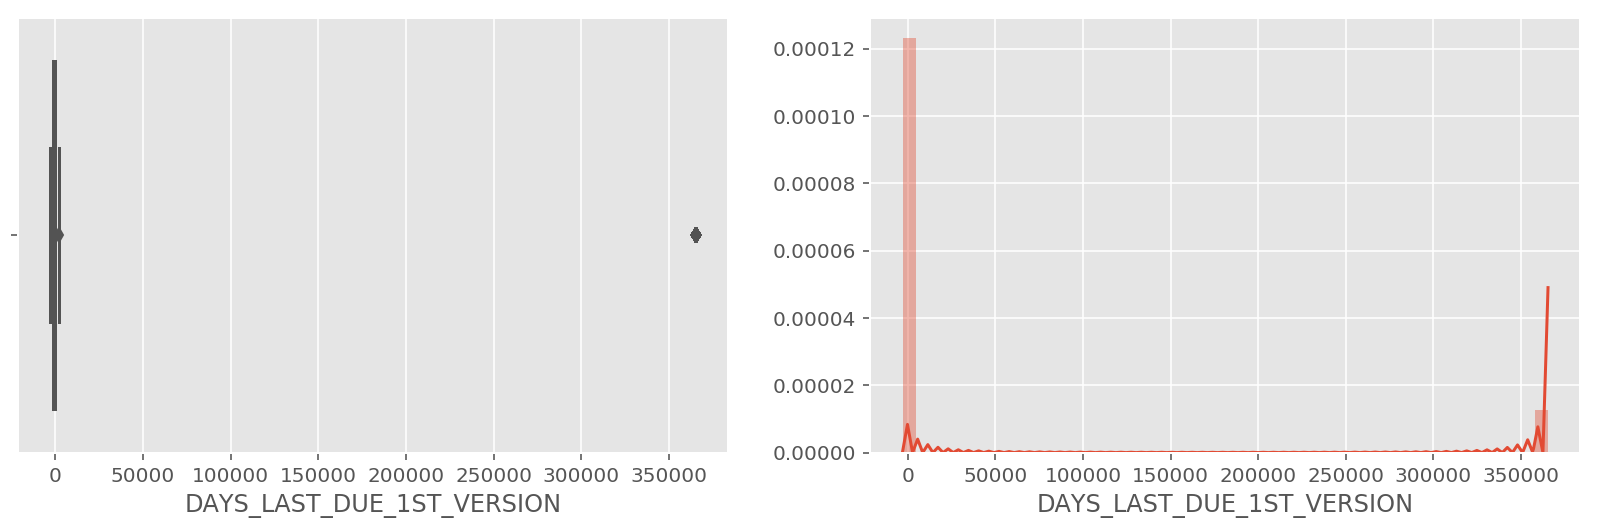

DAYS_LAST_DUE: 

Relative to application date of current application when was the last due date of the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: DAYS_LAST_DUE, dtype: float64

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


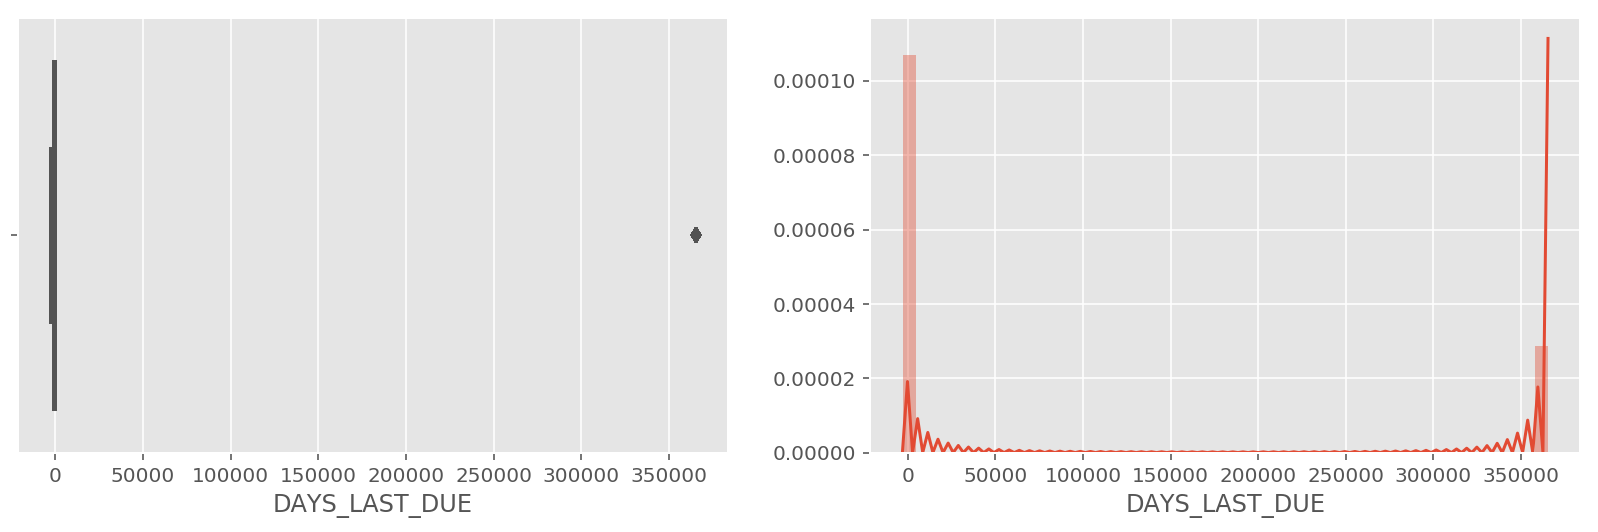

DAYS_TERMINATION: 

Relative to application date of current application when was the expected termination of the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: DAYS_TERMINATION, dtype: float64

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


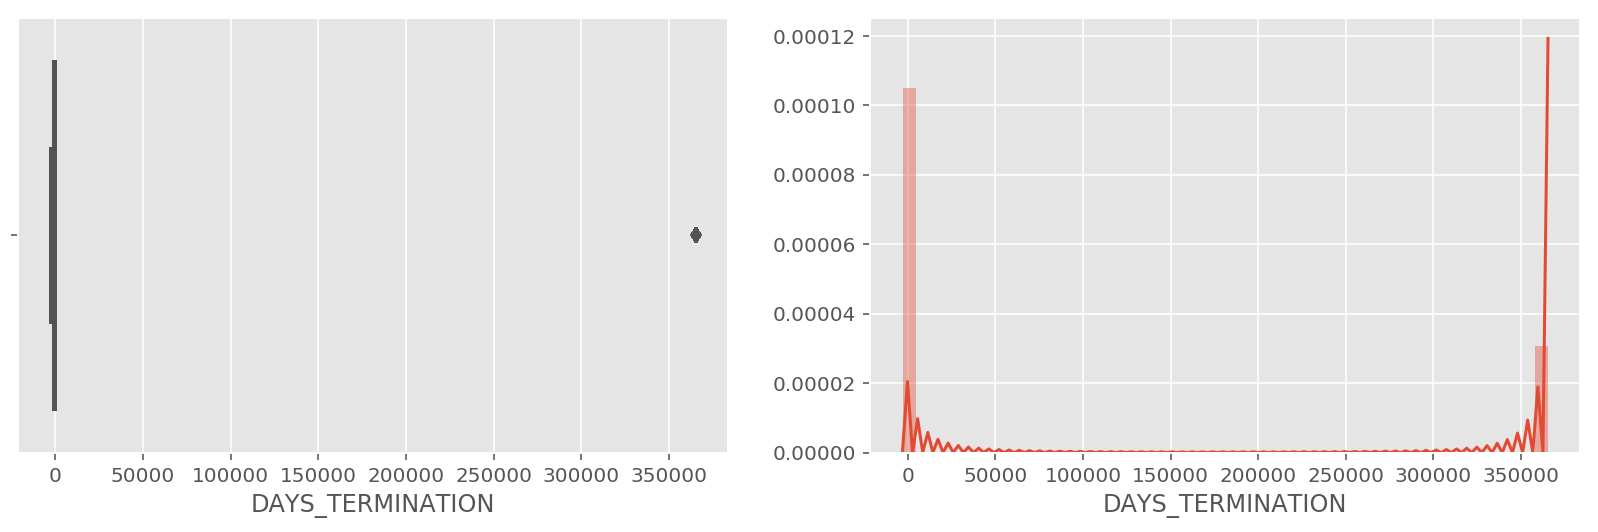

FLAG_LAST_APPL_PER_CONTRACT: 

Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

    Percent    Total
Y  0.994926  1661739
N  0.005074     8475


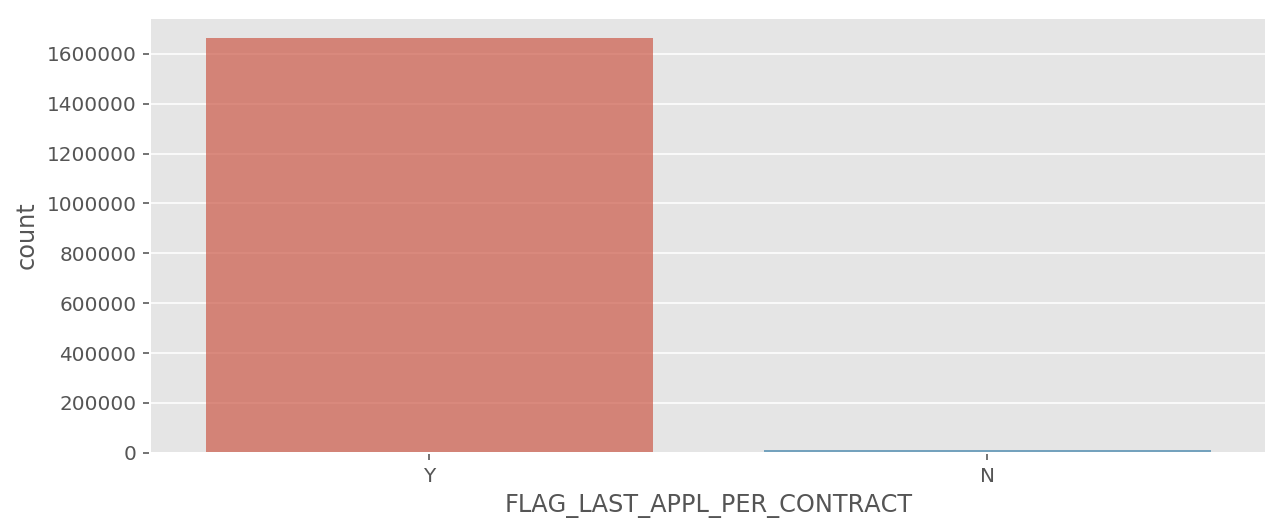

WEEKDAY_APPR_PROCESS_START: 

On which day of the week did the client apply for the loan

On which day of the week did the client apply for previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

            Percent   Total
TUESDAY    0.152746  255118
WEDNESDAY  0.152681  255010
MONDAY     0.151811  253557
FRIDAY     0.150908  252048
THURSDAY   0.149142  249099
SATURDAY   0.144072  240631
SUNDAY     0.098641  164751


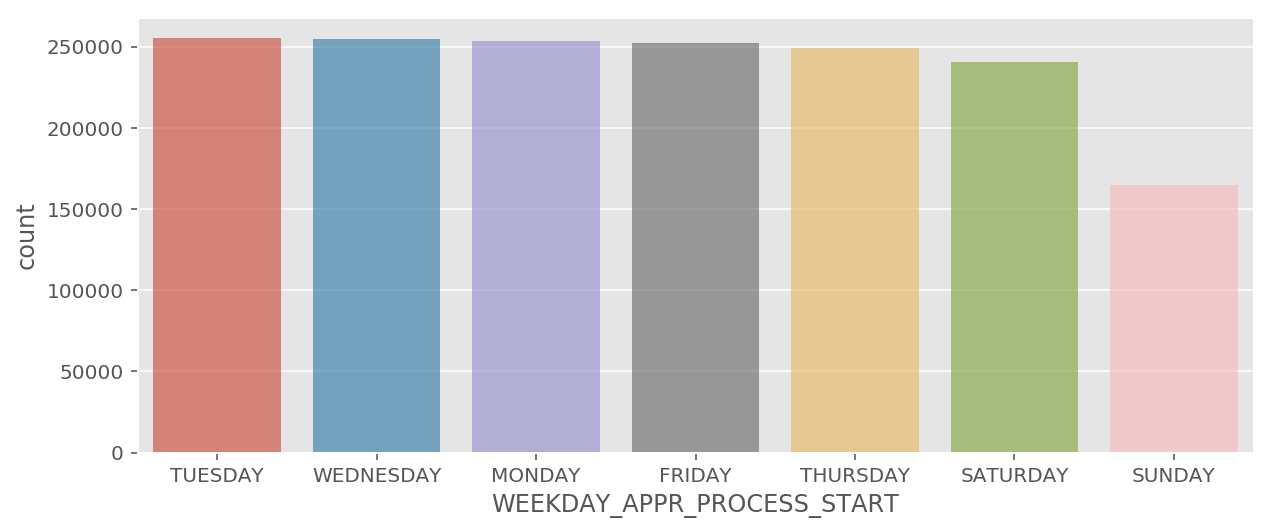

NAME_PORTFOLIO: 

Was the previous application for CASH, POS, CAR, …

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_PORTFOLIO, dtype: float64

        Percent   Total
POS    0.413726  691011
Cash   0.276350  461563
XNA    0.222864  372230
Cards  0.086806  144985
Cars   0.000254     425


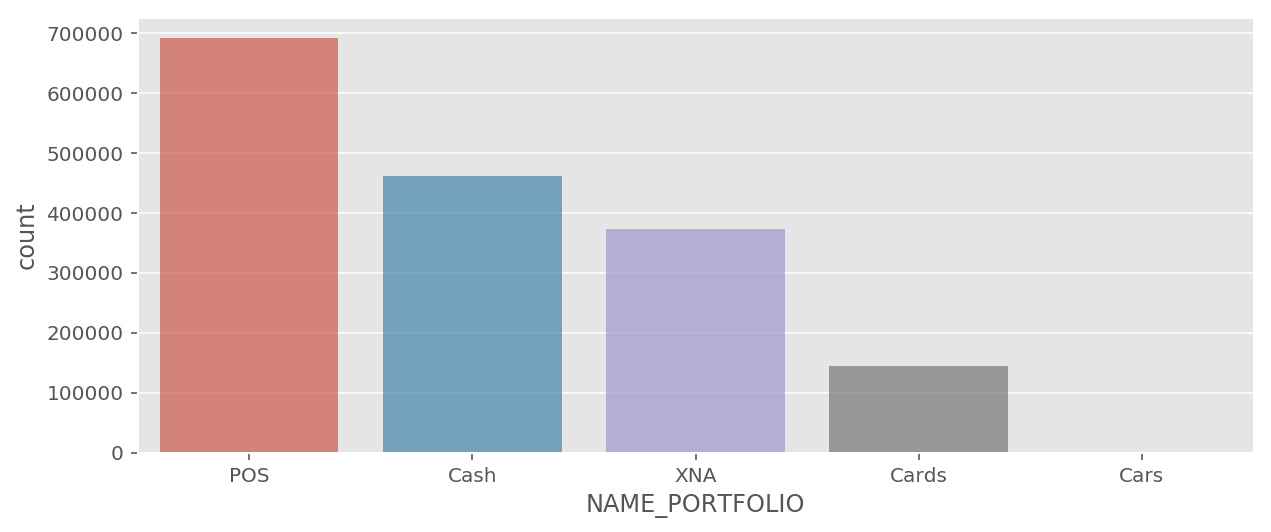

NAME_PRODUCT_TYPE: 

Was the previous application x-sell o walk-in

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_PRODUCT_TYPE, dtype: float64

          Percent    Total
XNA      0.636844  1063666
x-sell   0.273191   456287
walk-in  0.089965   150261


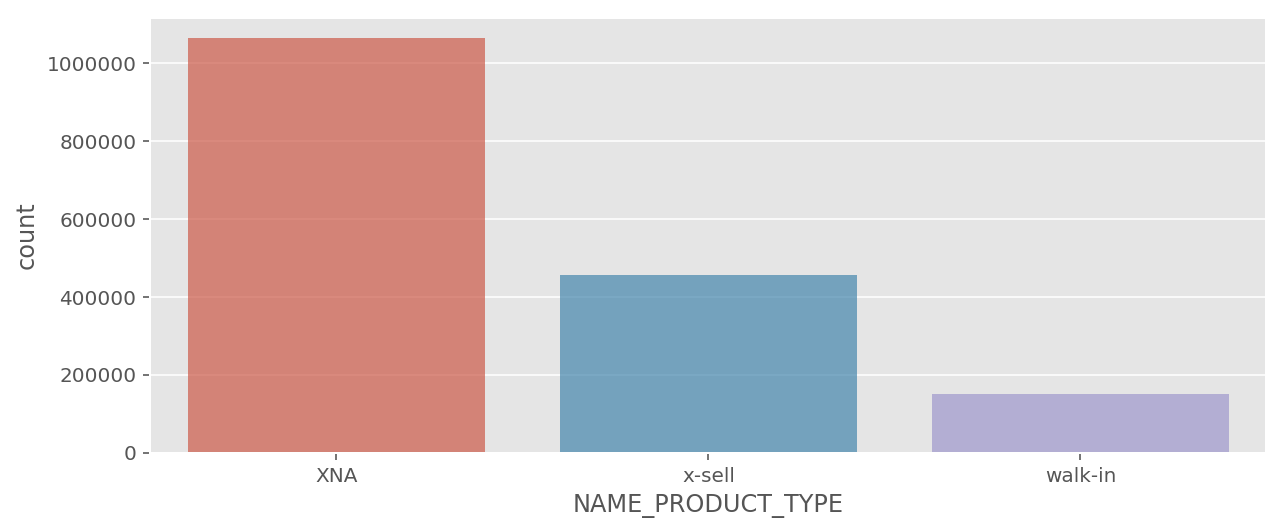

NFLAG_LAST_APPL_IN_DAY: 

Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

    Percent    Total
1  0.996468  1664314
0  0.003532     5900


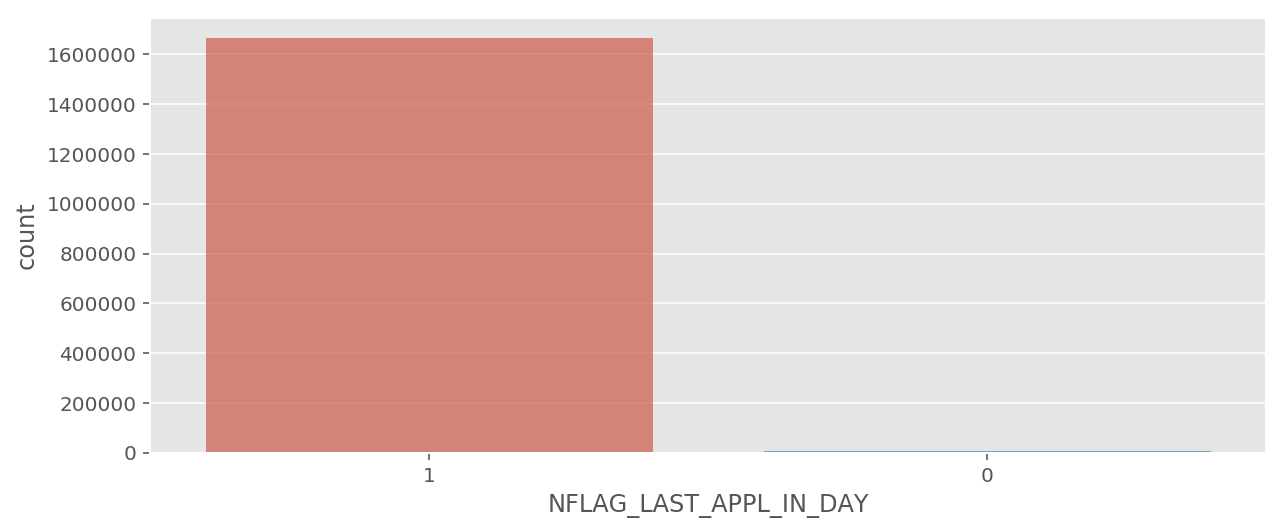

CHANNEL_TYPE: 

Through which channel we acquired the client on the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CHANNEL_TYPE, dtype: float64

                             Percent   Total
Credit and cash offices     0.431063  719968
Country-wide                0.296184  494690
Stone                       0.126980  212083
Regional / Local            0.064978  108528
Contact center              0.042687   71297
AP+ (Cash loan)             0.034155   57046
Channel of corporate sales  0.003682    6150
Car dealer                  0.000271     452


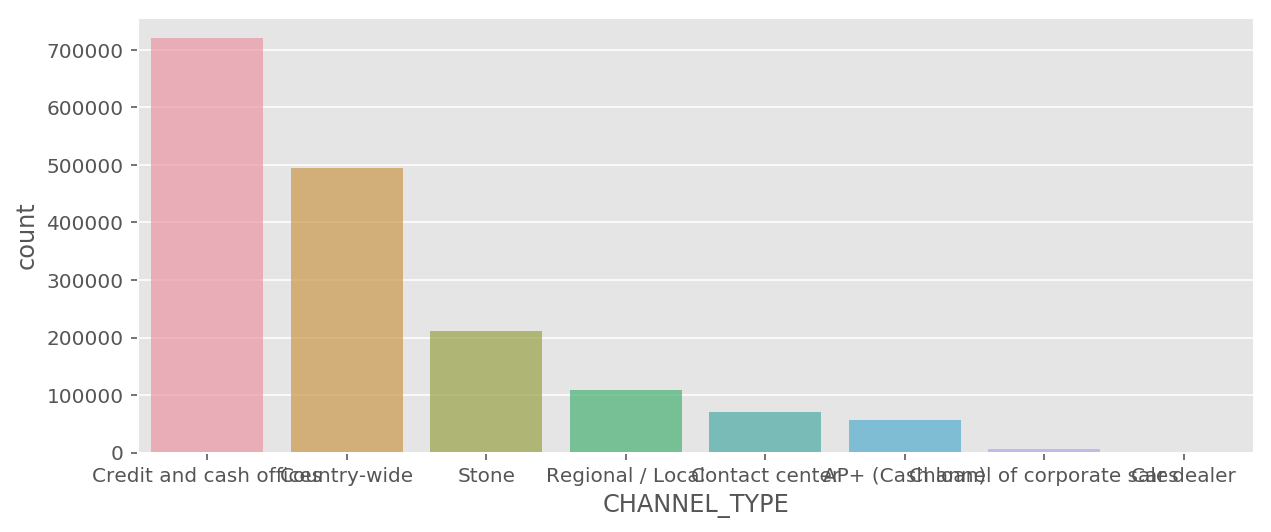

NAME_TYPE_SUITE: 

Who was accompanying client when he was applying for the loan

Who accompanied client when applying for the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      820405.000000
Percent        49.119754
Name: NAME_TYPE_SUITE, dtype: float64

                  Percent   Total
Unaccompanied    0.598923  508970
Family           0.250954  213263
Spouse, partner  0.078922   67069
Children         0.037145   31566
Other_B          0.020739   17624
Other_A          0.010681    9077
Group of people  0.002636    2240


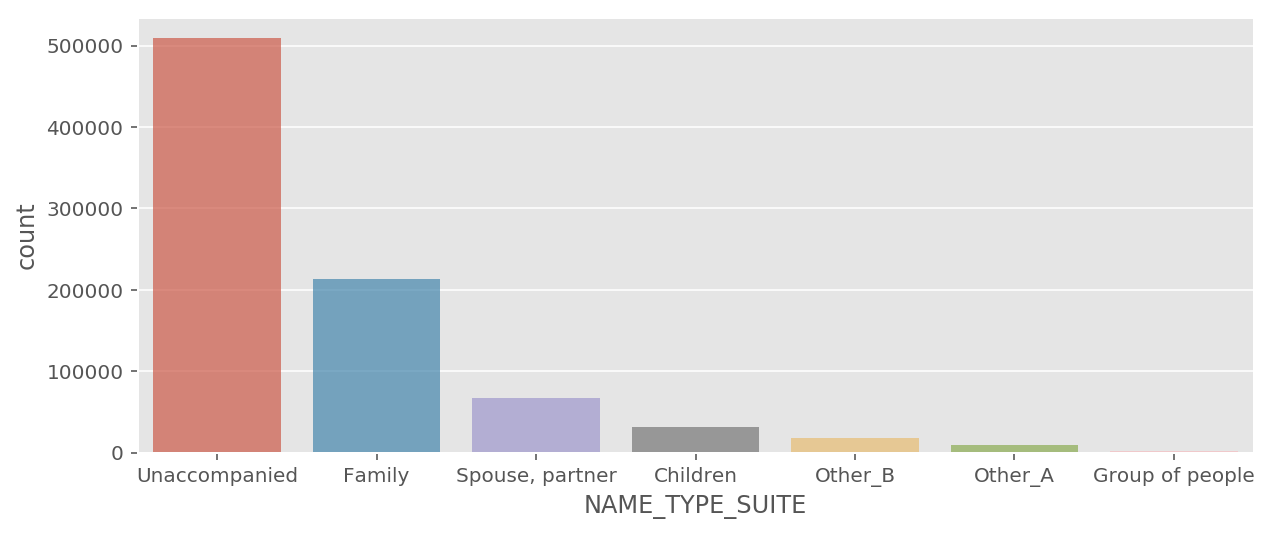

NAME_CONTRACT_STATUS: 

Contract status during the month

Contract status (active signed,...) on the previous credit

Contract status (approved, cancelled, ...) of previous application

Table: ['POS_CASH_balance.csv' 'credit_card_balance.csv'
 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CONTRACT_STATUS, dtype: float64

               Percent    Total
Approved      0.620747  1036781
Canceled      0.189388   316319
Refused       0.174036   290678
Unused offer  0.015828    26436


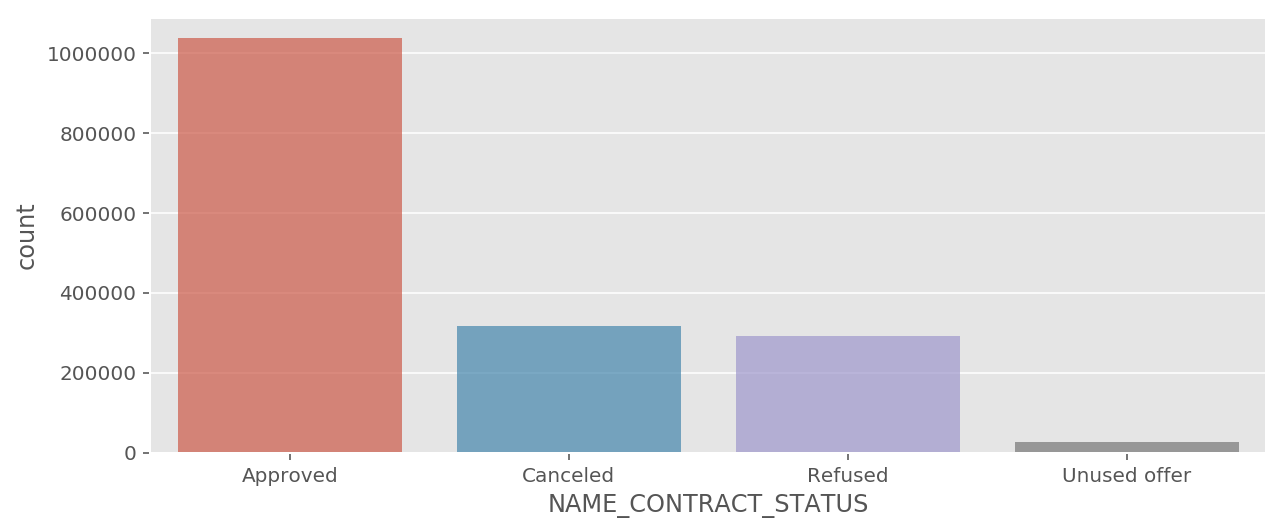

NAME_YIELD_GROUP: 

Grouped interest rate into small medium and high of the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_YIELD_GROUP, dtype: float64

             Percent   Total
XNA         0.309670  517215
middle      0.230828  385532
high        0.211548  353331
low_normal  0.192847  322095
low_action  0.055107   92041


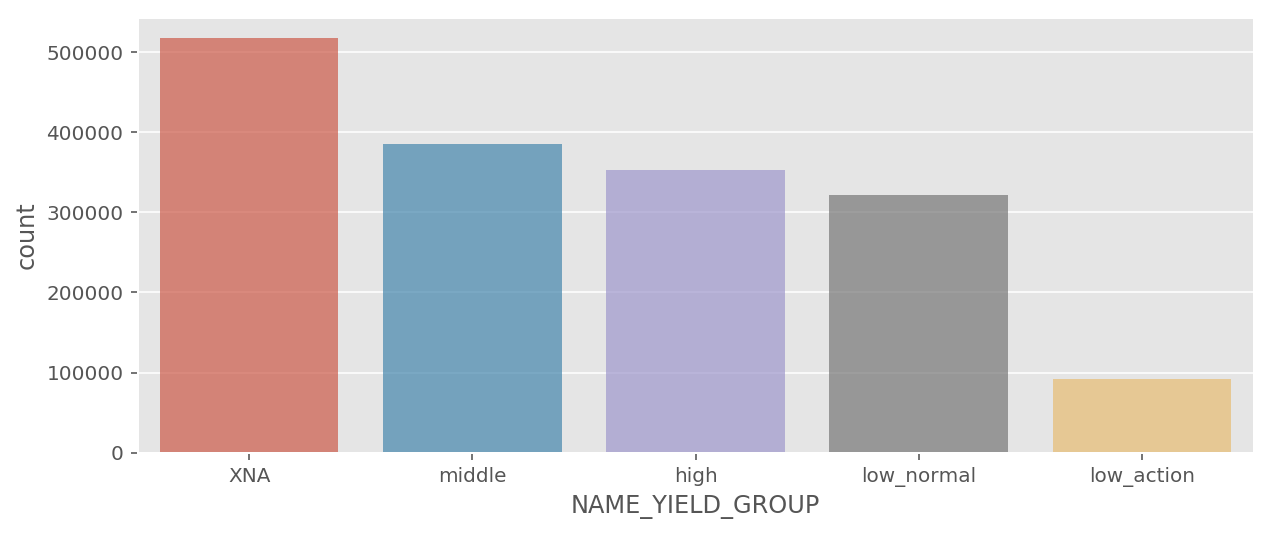

NAME_CONTRACT_TYPE: 

Identification if loan is cash or revolving

Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CONTRACT_TYPE, dtype: float64

                  Percent   Total
Cash loans       0.447579  747553
Consumer loans   0.436561  729151
Revolving loans  0.115652  193164
XNA              0.000207     346


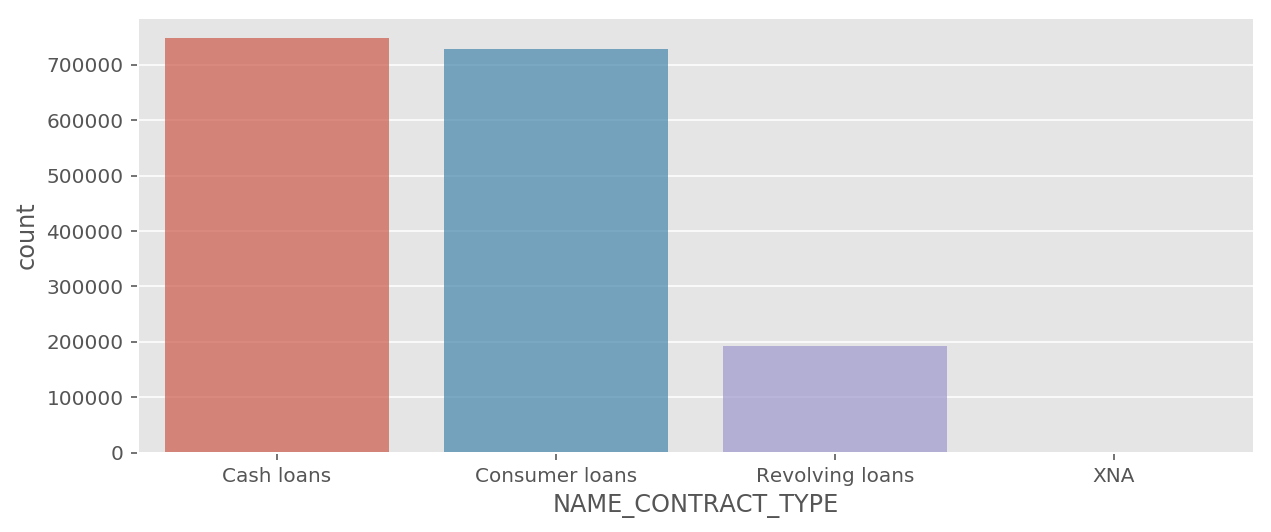

NAME_CLIENT_TYPE: 

Was the client old or new client when applying for the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CLIENT_TYPE, dtype: float64

            Percent    Total
Repeater   0.737188  1231261
New        0.180434   301363
Refreshed  0.081217   135649
XNA        0.001162     1941


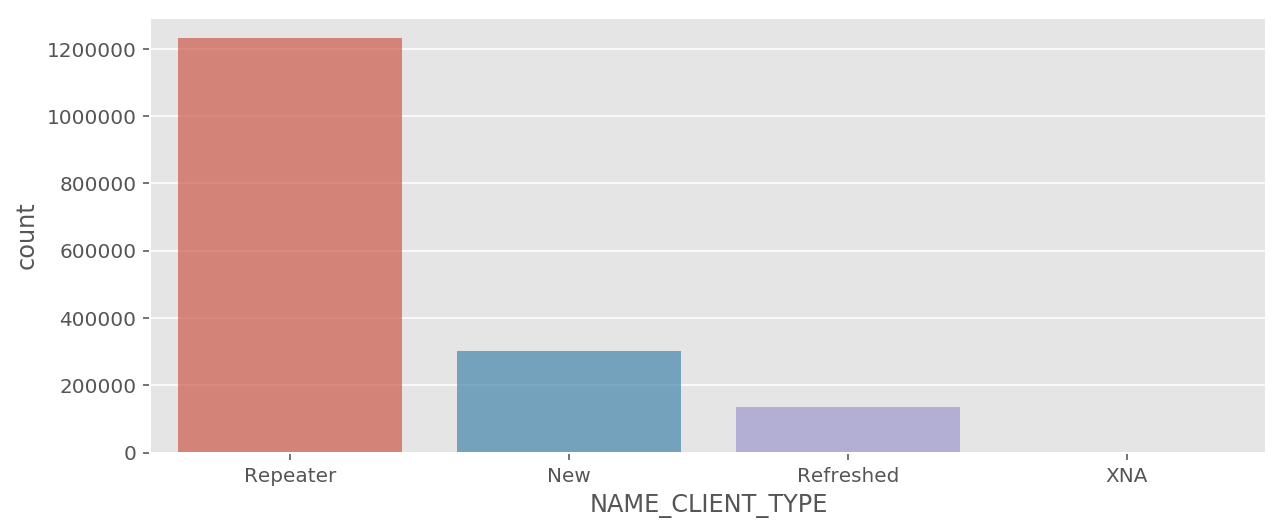

CODE_REJECT_REASON: 

Why was the previous application rejected

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CODE_REJECT_REASON, dtype: float64

         Percent    Total
XAP     0.810132  1353093
HC      0.104915   175231
LIMIT   0.033337    55680
SCO     0.022432    37467
CLIENT  0.015828    26436
SCOFR   0.007670    12811
XNA     0.003140     5244
VERIF   0.002116     3535
SYSTEM  0.000429      717


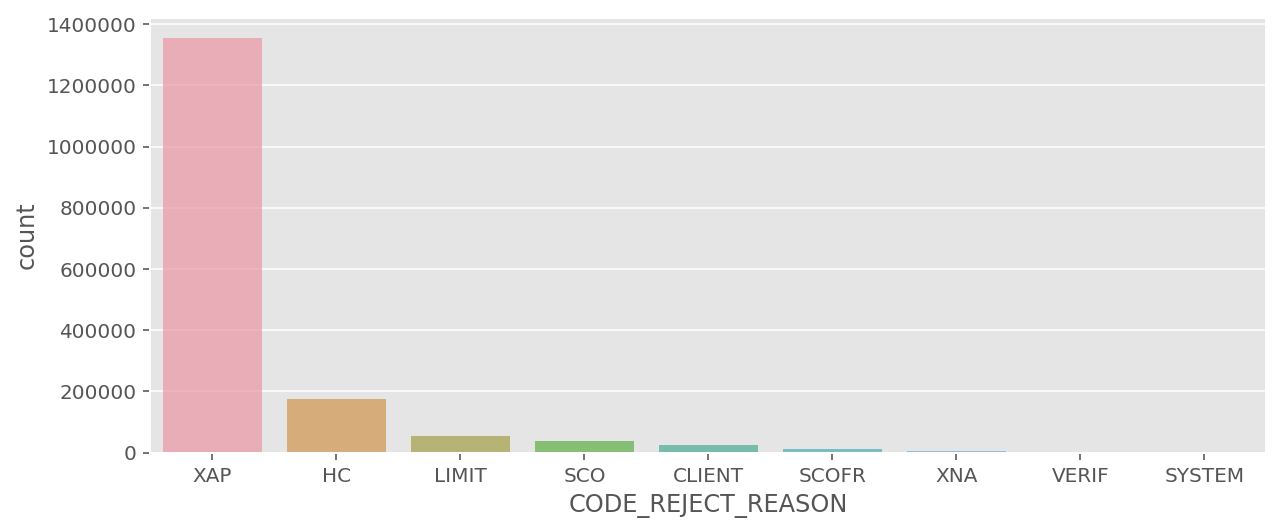

NAME_GOODS_CATEGORY: 

What kind of goods did the client apply for in the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_GOODS_CATEGORY, dtype: float64

                               Percent   Total
XNA                       5.692738e-01  950809
Mobile                    1.345384e-01  224708
Consumer Electronics      7.279067e-02  121576
Computers                 6.332662e-02  105769
Audio/Video               5.953788e-02   99441
Furniture                 3.212522e-02   53656
Photo / Cinema Equipment  1.498072e-02   25021
Construction Materials    1.496515e-02   24995
Clothing and Accessories  1.410238e-02   23554
Auto Accessories          4.419194e-03    7381
Jewelry                   3.765984e-03    6290
Homewares                 3.007399e-03    5023
Medical Supplies          2.300903e-03    3843
Vehicles                  2.017706e-03    3370
Sport and Leisure         1.784801e-03    2981
Gardening                 

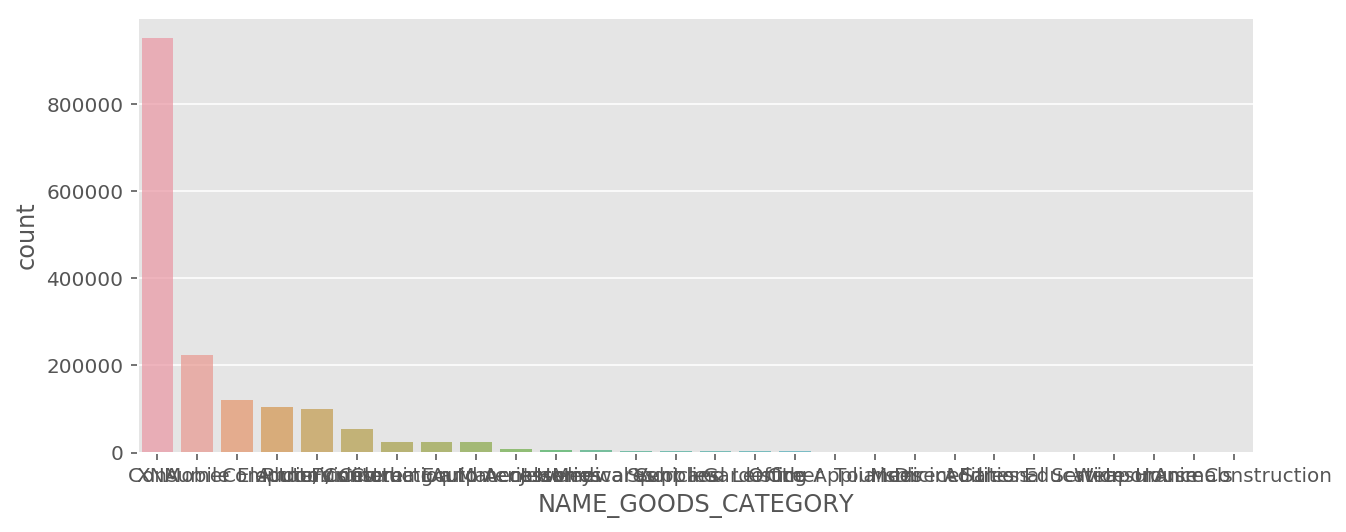

NFLAG_INSURED_ON_APPROVAL: 

Did the client requested insurance during the previous application

Table: ['previous_application.csv']

Missing values:
Total      673065.000000
Percent        40.298129
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

     Percent   Total
0.0  0.66743  665527
1.0  0.33257  331622


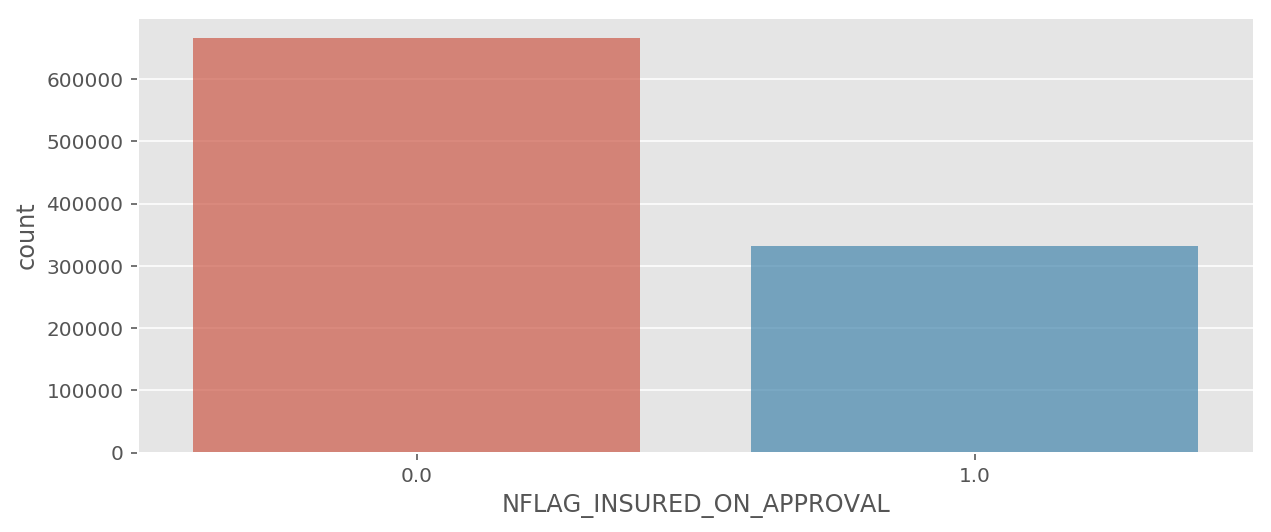

PRODUCT_COMBINATION: 

Detailed product combination of the previous application

Table: ['previous_application.csv']

Missing values:
Total      346.000000
Percent      0.020716
Name: PRODUCT_COMBINATION, dtype: float64

                                 Percent   Total
Cash                            0.171265  285990
POS household with interest     0.157870  263622
POS mobile with interest        0.132148  220670
Cash X-Sell: middle             0.086164  143883
Cash X-Sell: low                0.077999  130248
Card Street                     0.067420  112582
POS industry with interest      0.059186   98833
POS household without interest  0.049649   82908
Card X-Sell                     0.048257   80582
Cash Street: high               0.035715   59639
Cash X-Sell: high               0.035512   59301
Cash Street: middle             0.020755   34658
Cash Street: low                0.020261   33834
POS mobile without interest     0.014421   24082
POS other with interest         0.014300   2

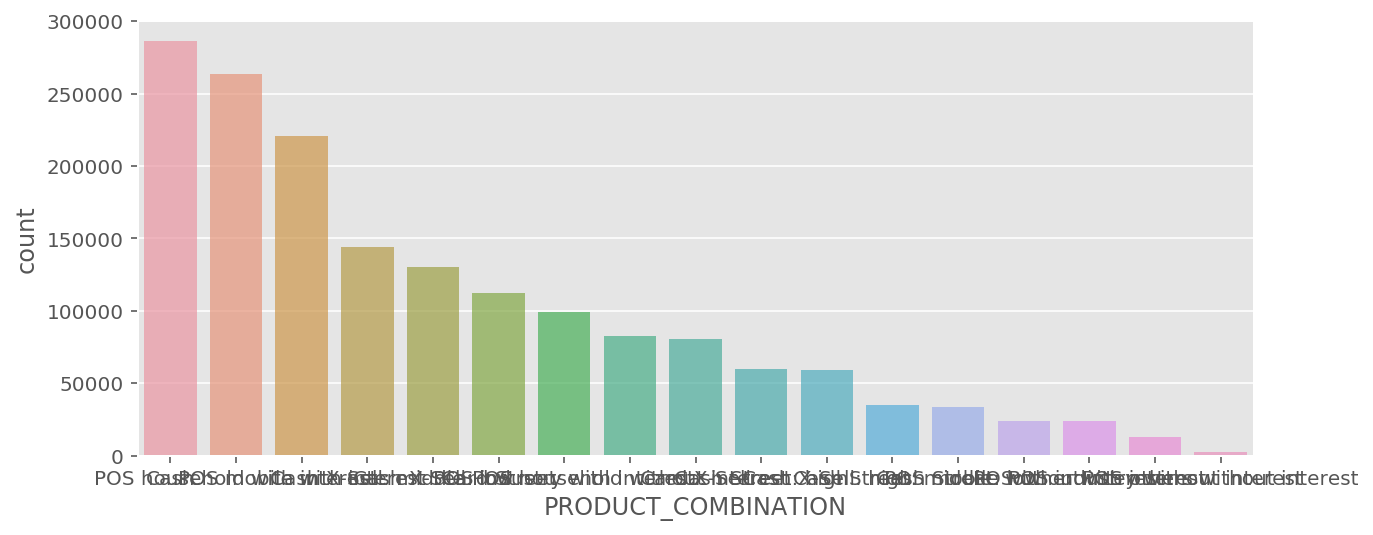

NAME_PAYMENT_TYPE: 

Payment method that client chose to pay for the previous application

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_PAYMENT_TYPE, dtype: float64

                                            Percent    Total
Cash through the bank                      0.618814  1033552
XNA                                        0.375631   627384
Non-cash from your account                 0.004905     8193
Cashless from the account of the employer  0.000650     1085


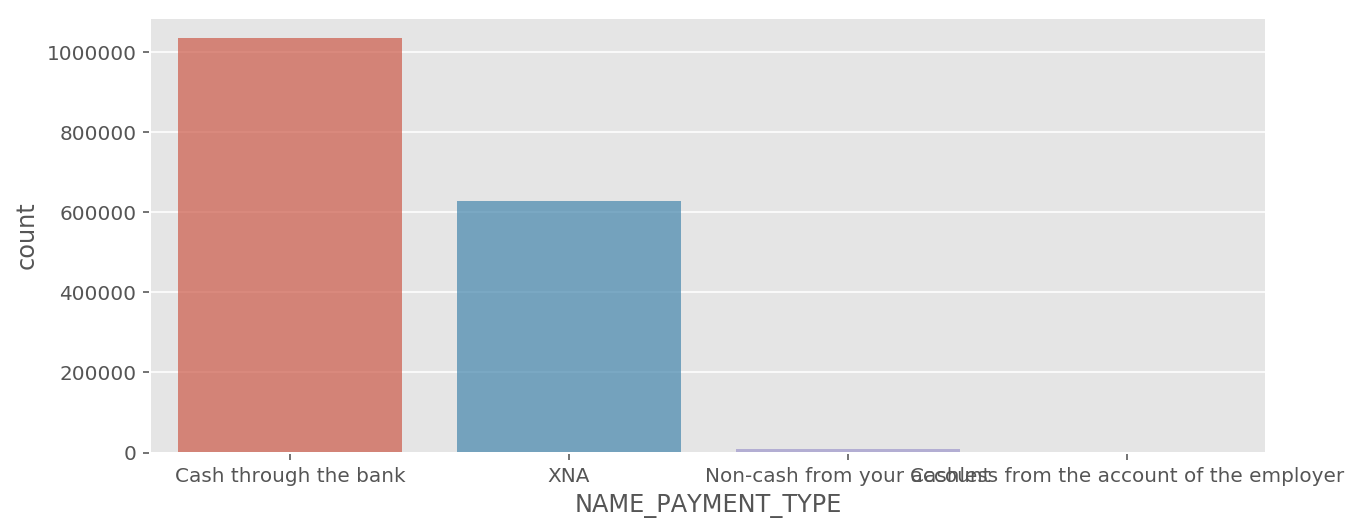

NAME_CASH_LOAN_PURPOSE: 

Purpose of the cash loan

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64

                                   Percent   Total
XAP                               0.552421  922661
XNA                               0.405887  677918
Repairs                           0.014229   23765
Other                             0.009345   15608
Urgent needs                      0.005036    8412
Buying a used car                 0.001729    2888
Building a house or an annex      0.001612    2693
Everyday expenses                 0.001447    2416
Medicine                          0.001302    2174
Payments on other loans           0.001156    1931
Education                         0.000942    1573
Journey                           0.000742    1239
Purchase of electronic equipment  0.000635    1061
Buying a new car                  0.000606    1012
Wedding / gift / holiday          0.000576     962
Buy

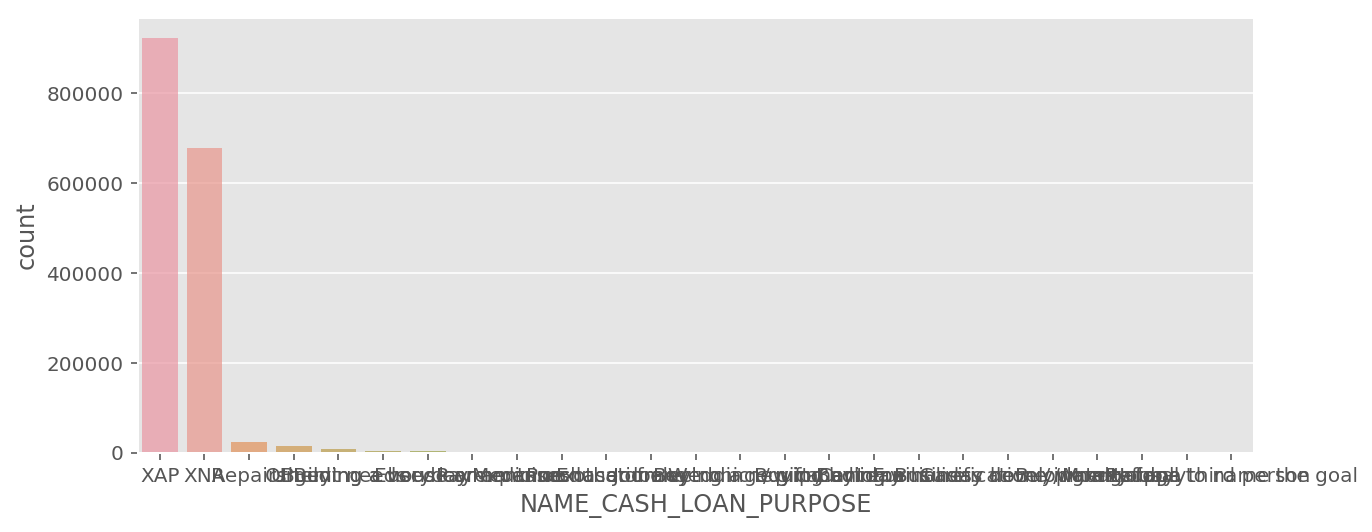

NAME_SELLER_INDUSTRY: 

The industry of the seller

Table: ['previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_SELLER_INDUSTRY, dtype: float64

                       Percent   Total
XNA                   0.512342  855720
Consumer electronics  0.238451  398265
Connectivity          0.165266  276029
Furniture             0.034636   57849
Construction          0.017831   29781
Clothing              0.014339   23949
Industry              0.011492   19194
Auto technology       0.002988    4990
Jewelry               0.001622    2709
MLM partners          0.000727    1215
Tourism               0.000307     513


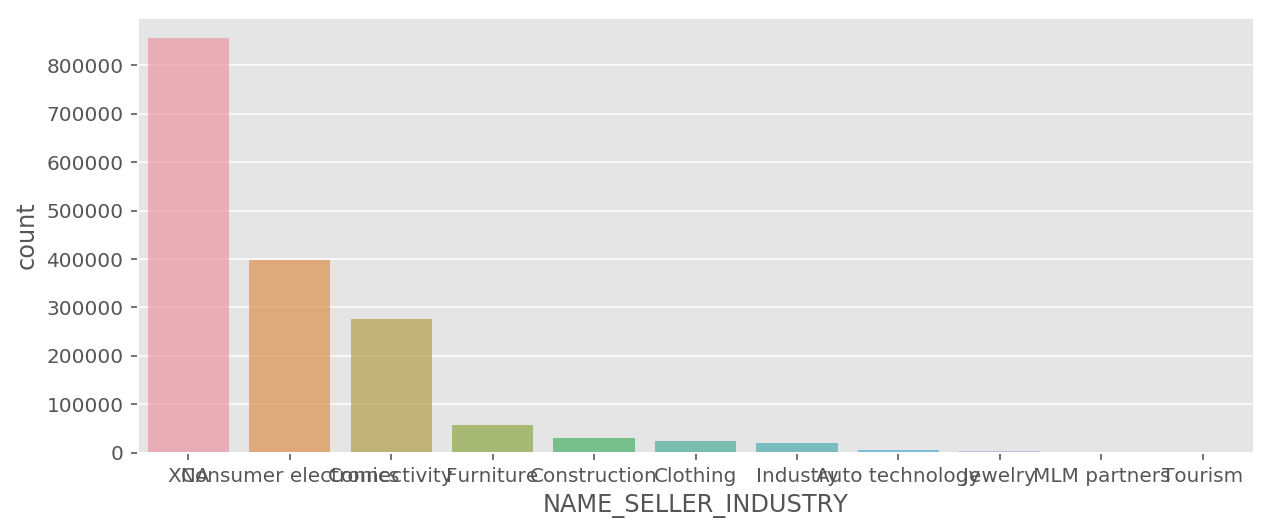

In [83]:
previous_application = pd.read_csv('data/previous_application.csv.zip')
previous_application.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1, inplace=True)
wrap_func(previous_application)

                Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
object    1
int64     1
dtype: int64
MONTHS_BALANCE: 

Month of balance relative to application date (-1 means the freshest balance date)

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

Month of balance relative to application date (-1 means the freshest balance date)

Table: ['bureau_balance.csv' 'POS_CASH_balance.csv' 'credit_card_balance.csv']

Missing values:
Total      0.0
Percent    0.0
Name: MONTHS_BALANCE, dtype: float64

count    2.729992e+07
mean    -3.074169e+01
std      2.386451e+01
min     -9.600000e+01
25%     -4.600000e+01
50%     -2.500000e+01
75%     -1.100000e+01
max      0.000000e+00
Name: MONTHS_BALANCE, dtype: float64


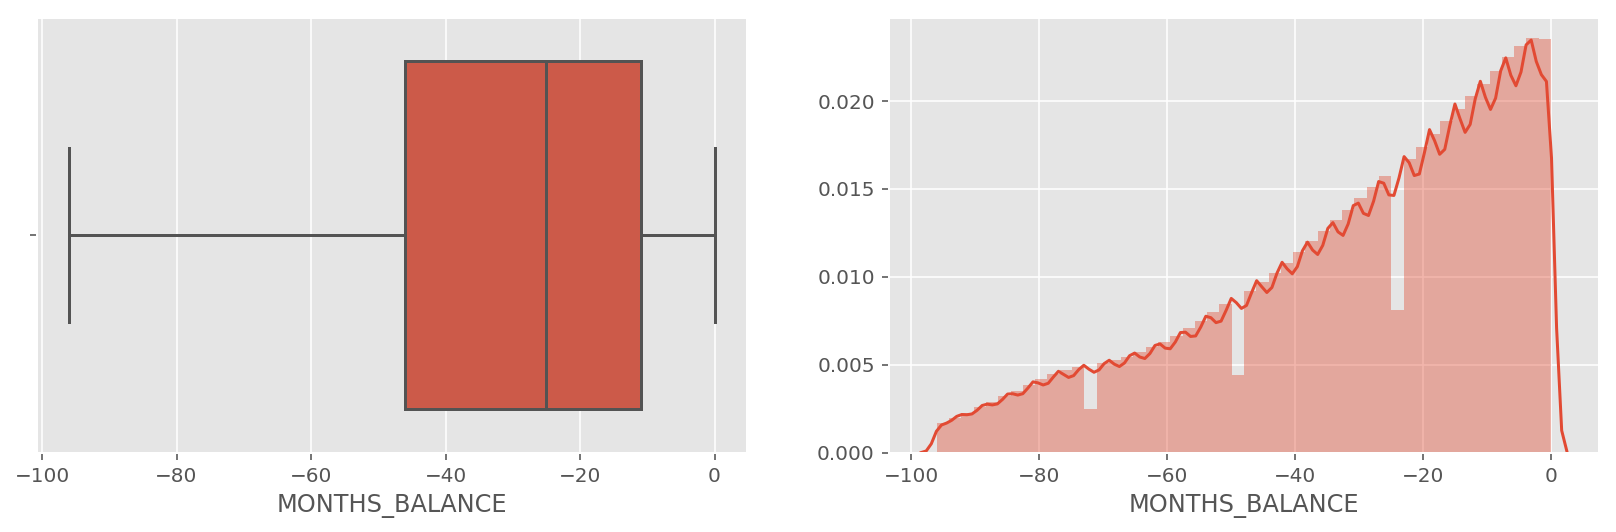

STATUS: 

Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

Table: ['bureau_balance.csv']

Missing values:
Total      0.0
Percent    0.0
Name: STATUS, dtype: float64

    Percent     Total
C  0.499891  13646993
0  0.274708   7499507
X  0.212839   5810482
1  0.008877    242347
5  0.002286     62406
2  0.000858     23419
3  0.000327      8924
4  0.000214      5847


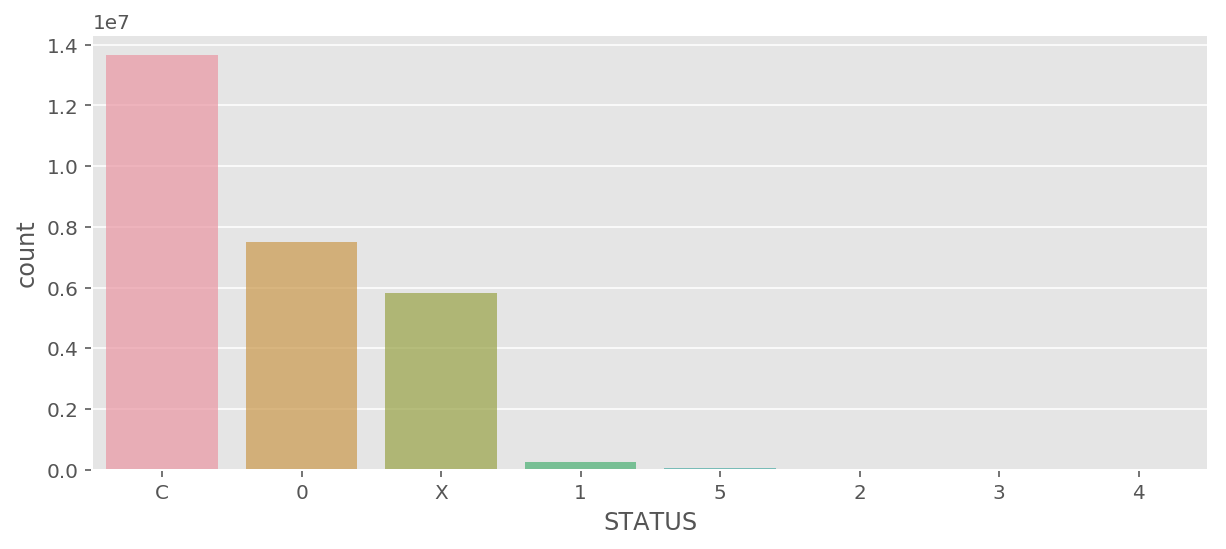

In [85]:
bureau_balance = previous_application = pd.read_csv('data/bureau_balance.csv.zip')
bureau_balance.drop(['SK_ID_BUREAU'], axis=1, inplace=True)
wrap_func(bureau_balance)

                        Total   Percent
AMT_PAYMENT              2905  0.021352
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_INSTALMENT              0  0.000000
DAYS_INSTALMENT             0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
float64    5
int64      1
dtype: int64
NUM_INSTALMENT_VERSION: 

Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NUM_INSTALMENT_VERSION, dtype: float64

count    1.360540e+07
mean     8.566373e-01
std      1.035216e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.780000e+02
Name: NUM_INSTALMENT_VERSION, dtype: float64


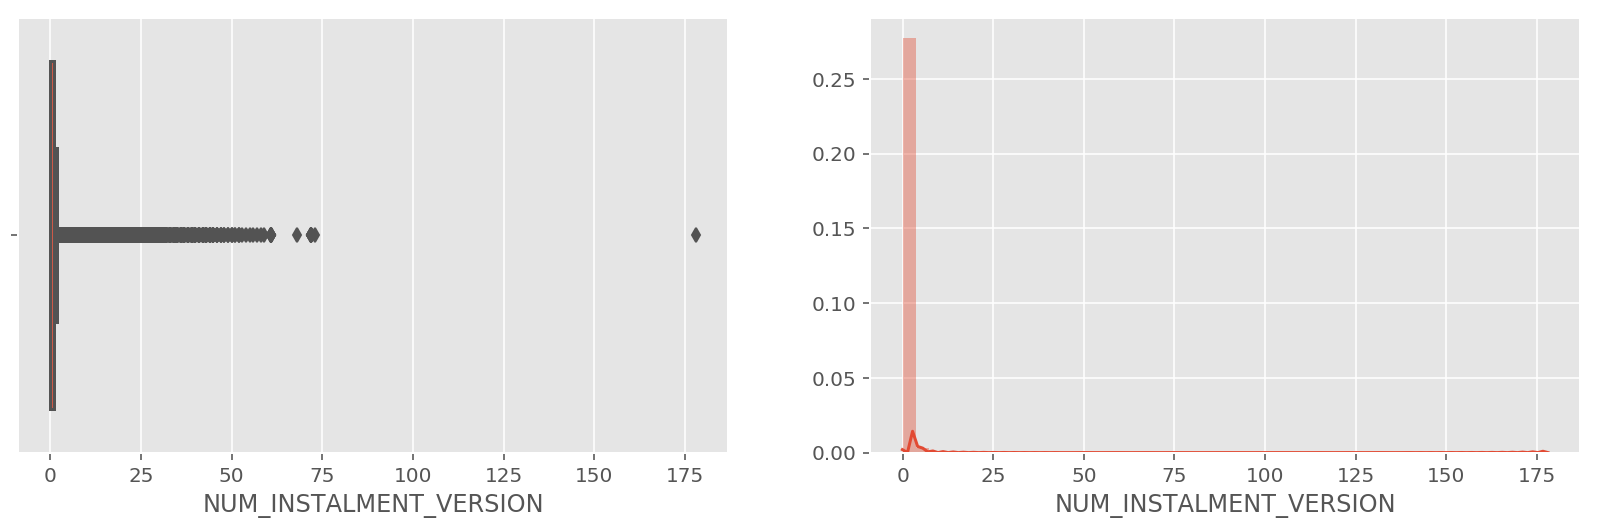

NUM_INSTALMENT_NUMBER: 

On which installment we observe payment

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NUM_INSTALMENT_NUMBER, dtype: float64

count    1.360540e+07
mean     1.887090e+01
std      2.666407e+01
min      1.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.900000e+01
max      2.770000e+02
Name: NUM_INSTALMENT_NUMBER, dtype: float64


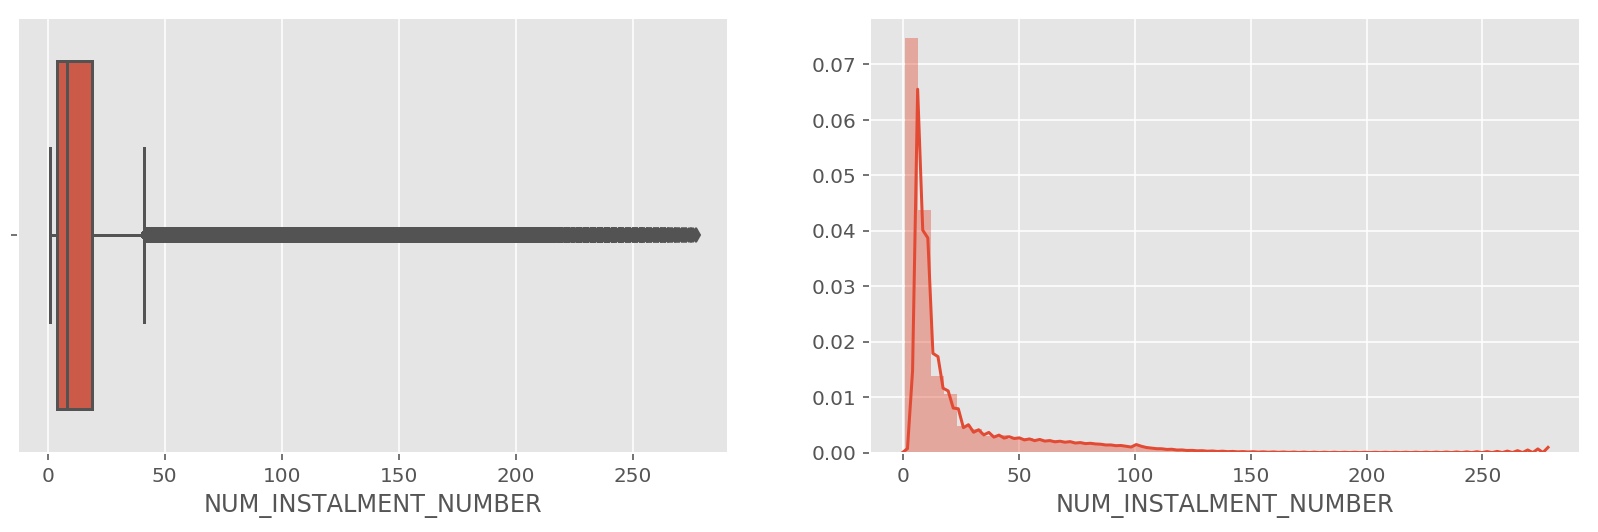

DAYS_INSTALMENT: 

When the installment of previous credit was supposed to be paid (relative to application date of current loan)

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_INSTALMENT, dtype: float64

count    1.360540e+07
mean    -1.042270e+03
std      8.009463e+02
min     -2.922000e+03
25%     -1.654000e+03
50%     -8.180000e+02
75%     -3.610000e+02
max     -1.000000e+00
Name: DAYS_INSTALMENT, dtype: float64


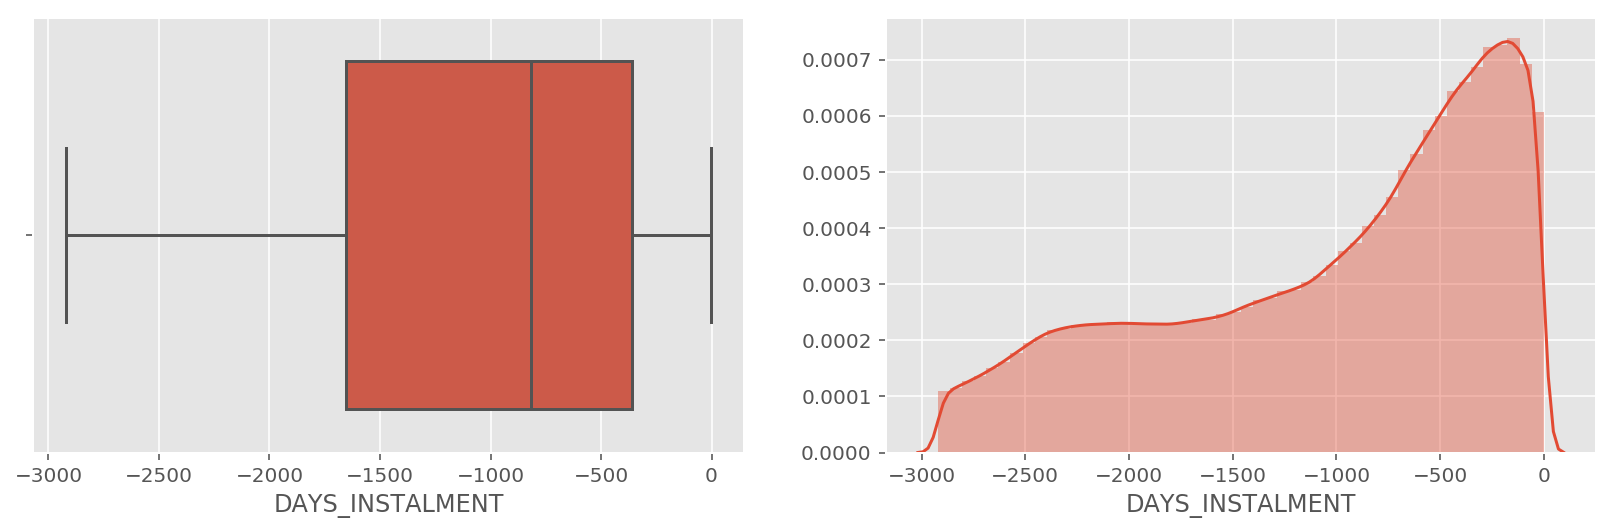

DAYS_ENTRY_PAYMENT: 

When was the installments of previous credit paid actually (relative to application date of current loan)

Table: ['installments_payments.csv']

Missing values:
Total      2905.000000
Percent       0.021352
Name: DAYS_ENTRY_PAYMENT, dtype: float64

count    1.360250e+07
mean    -1.051114e+03
std      8.005859e+02
min     -4.921000e+03
25%     -1.662000e+03
50%     -8.270000e+02
75%     -3.700000e+02
max     -1.000000e+00
Name: DAYS_ENTRY_PAYMENT, dtype: float64


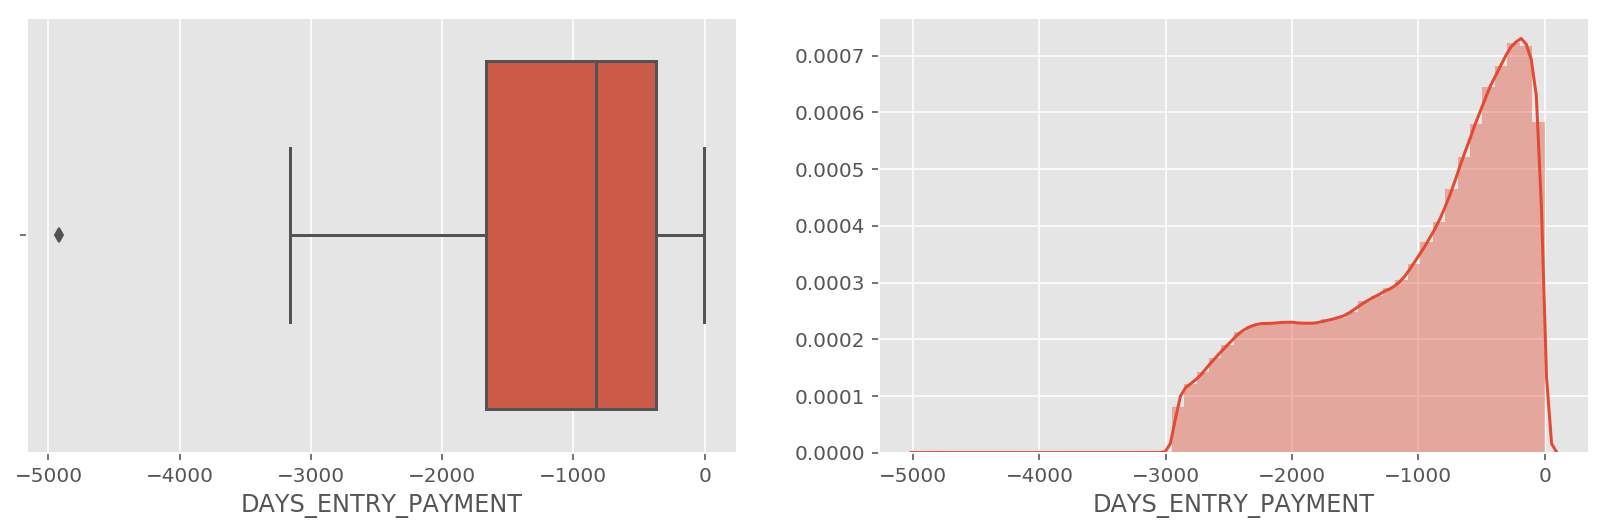

AMT_INSTALMENT: 

What was the prescribed installment amount of previous credit on this installment

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_INSTALMENT, dtype: float64

count    1.360540e+07
mean     1.705091e+04
std      5.057025e+04
min      0.000000e+00
25%      4.226085e+03
50%      8.884080e+03
75%      1.671021e+04
max      3.771488e+06
Name: AMT_INSTALMENT, dtype: float64


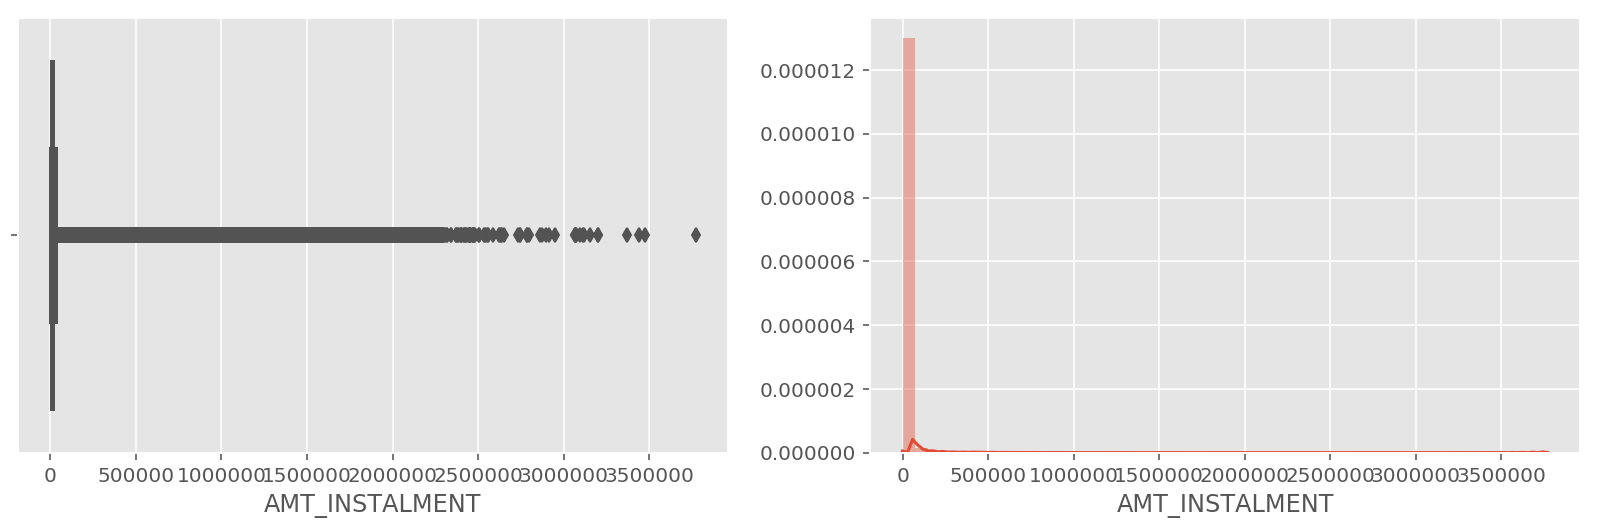

AMT_PAYMENT: 

What the client actually paid on previous credit on this installment

Table: ['installments_payments.csv']

Missing values:
Total      2905.000000
Percent       0.021352
Name: AMT_PAYMENT, dtype: float64

count    1.360250e+07
mean     1.723822e+04
std      5.473578e+04
min      0.000000e+00
25%      3.398265e+03
50%      8.125515e+03
75%      1.610842e+04
max      3.771488e+06
Name: AMT_PAYMENT, dtype: float64


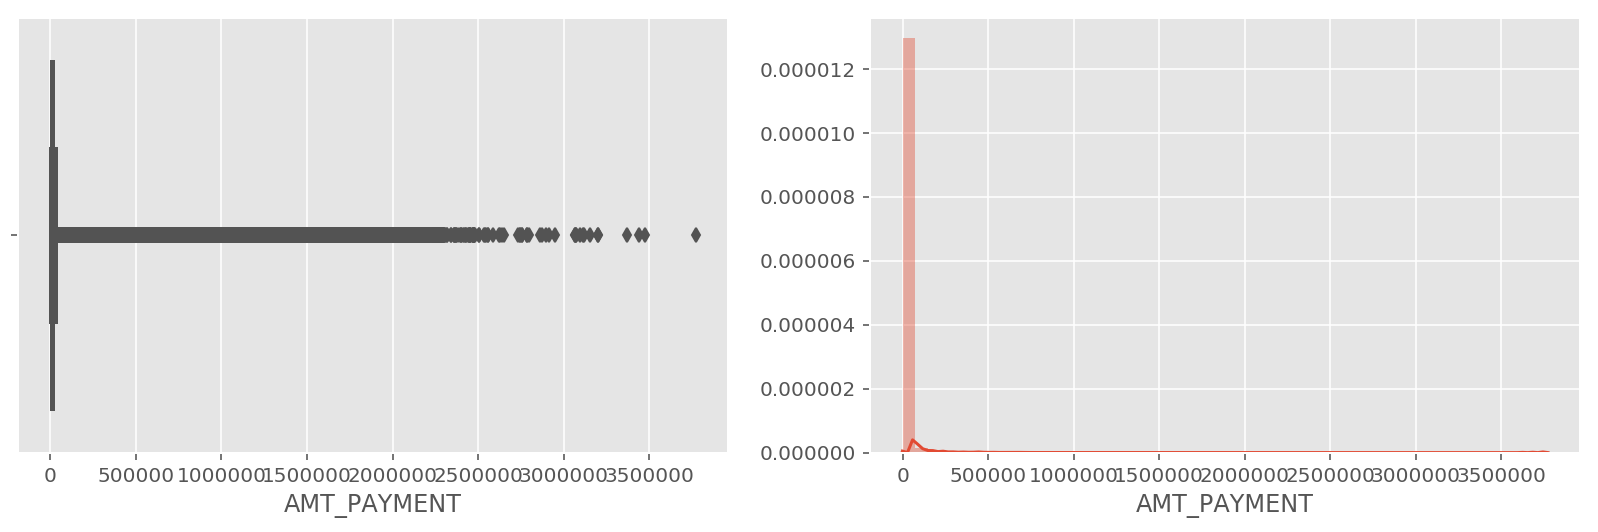

In [87]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv.zip')
credit_card_balance.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1, inplace=True)
wrap_func(credit_card_balance)

                        Total   Percent
AMT_PAYMENT              2905  0.021352
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_INSTALMENT              0  0.000000
DAYS_INSTALMENT             0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
float64    5
int64      1
dtype: int64
NUM_INSTALMENT_VERSION: 

Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NUM_INSTALMENT_VERSION, dtype: float64

count    1.360540e+07
mean     8.566373e-01
std      1.035216e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.780000e+02
Name: NUM_INSTALMENT_VERSION, dtype: float64


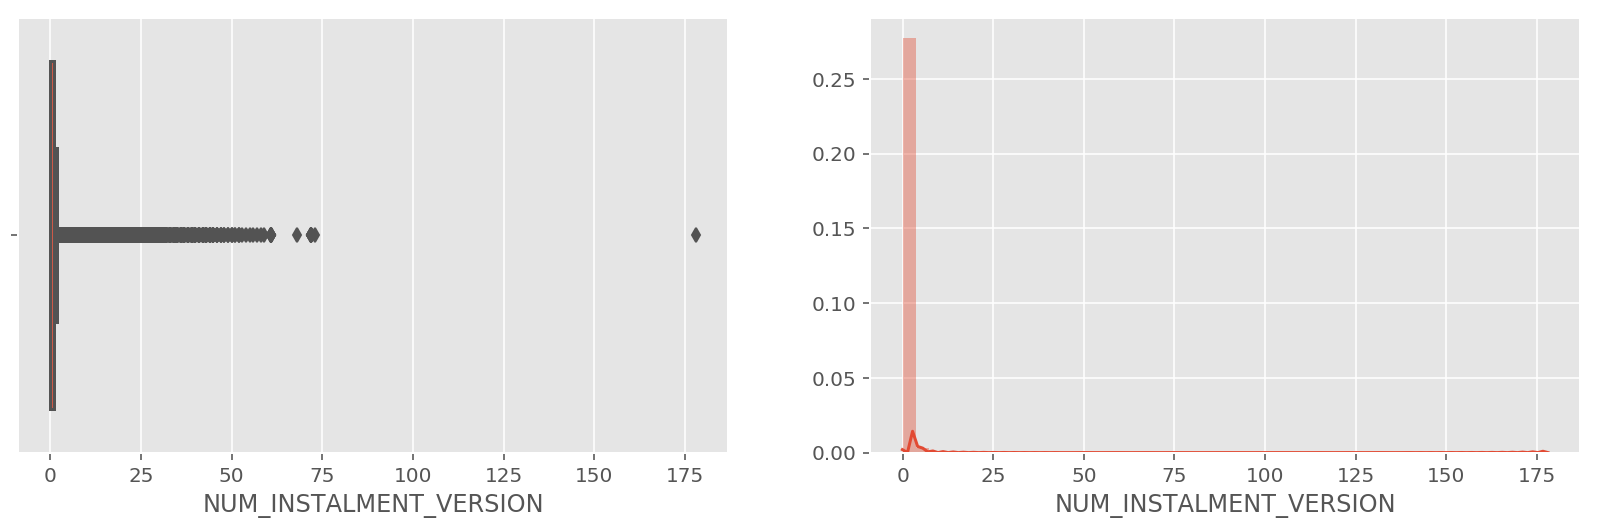

NUM_INSTALMENT_NUMBER: 

On which installment we observe payment

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NUM_INSTALMENT_NUMBER, dtype: float64

count    1.360540e+07
mean     1.887090e+01
std      2.666407e+01
min      1.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.900000e+01
max      2.770000e+02
Name: NUM_INSTALMENT_NUMBER, dtype: float64


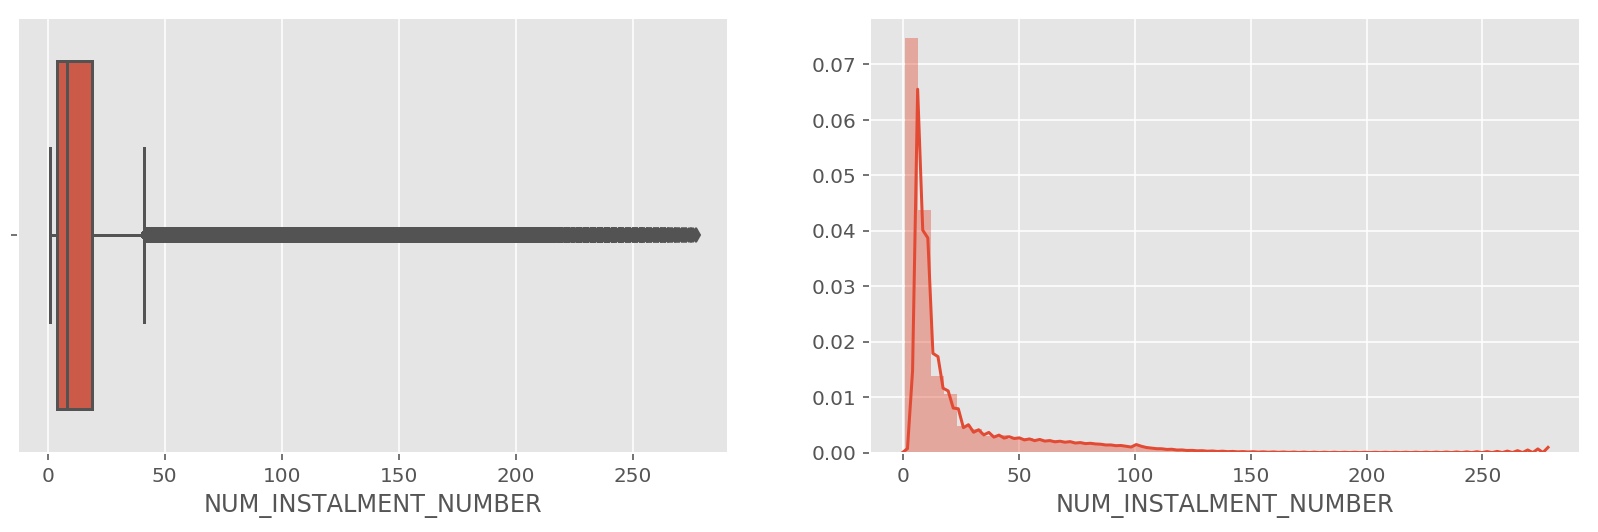

DAYS_INSTALMENT: 

When the installment of previous credit was supposed to be paid (relative to application date of current loan)

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_INSTALMENT, dtype: float64

count    1.360540e+07
mean    -1.042270e+03
std      8.009463e+02
min     -2.922000e+03
25%     -1.654000e+03
50%     -8.180000e+02
75%     -3.610000e+02
max     -1.000000e+00
Name: DAYS_INSTALMENT, dtype: float64


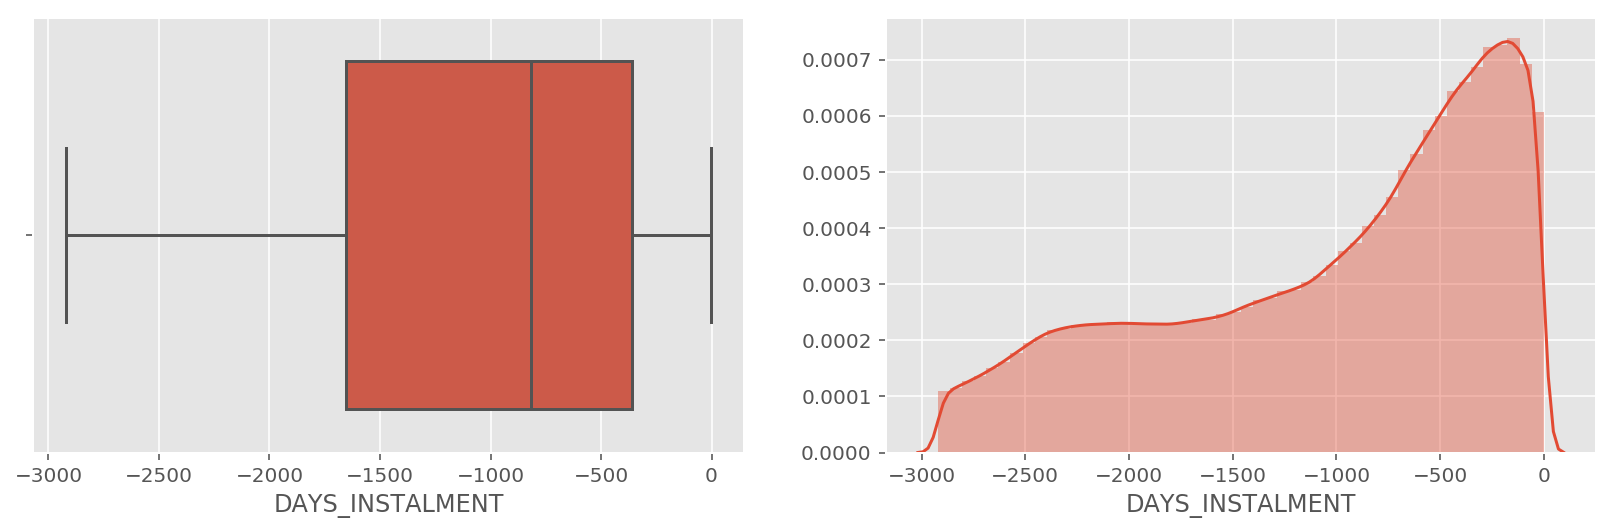

DAYS_ENTRY_PAYMENT: 

When was the installments of previous credit paid actually (relative to application date of current loan)

Table: ['installments_payments.csv']

Missing values:
Total      2905.000000
Percent       0.021352
Name: DAYS_ENTRY_PAYMENT, dtype: float64

count    1.360250e+07
mean    -1.051114e+03
std      8.005859e+02
min     -4.921000e+03
25%     -1.662000e+03
50%     -8.270000e+02
75%     -3.700000e+02
max     -1.000000e+00
Name: DAYS_ENTRY_PAYMENT, dtype: float64


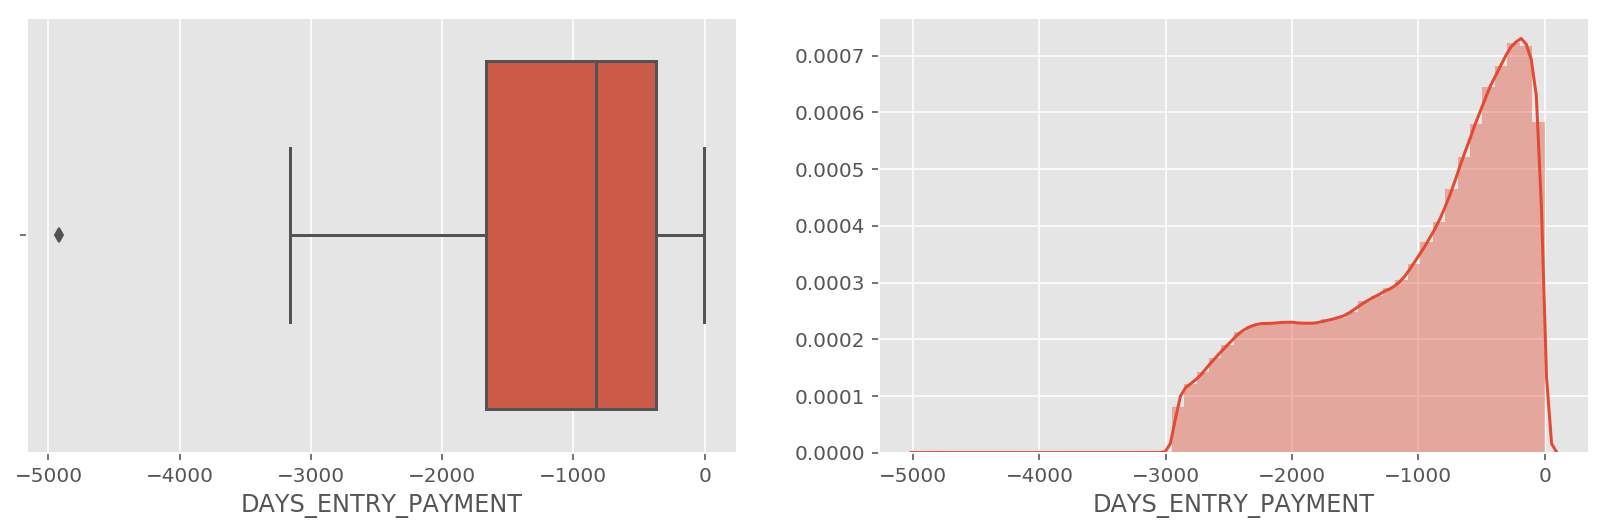

AMT_INSTALMENT: 

What was the prescribed installment amount of previous credit on this installment

Table: ['installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_INSTALMENT, dtype: float64

count    1.360540e+07
mean     1.705091e+04
std      5.057025e+04
min      0.000000e+00
25%      4.226085e+03
50%      8.884080e+03
75%      1.671021e+04
max      3.771488e+06
Name: AMT_INSTALMENT, dtype: float64


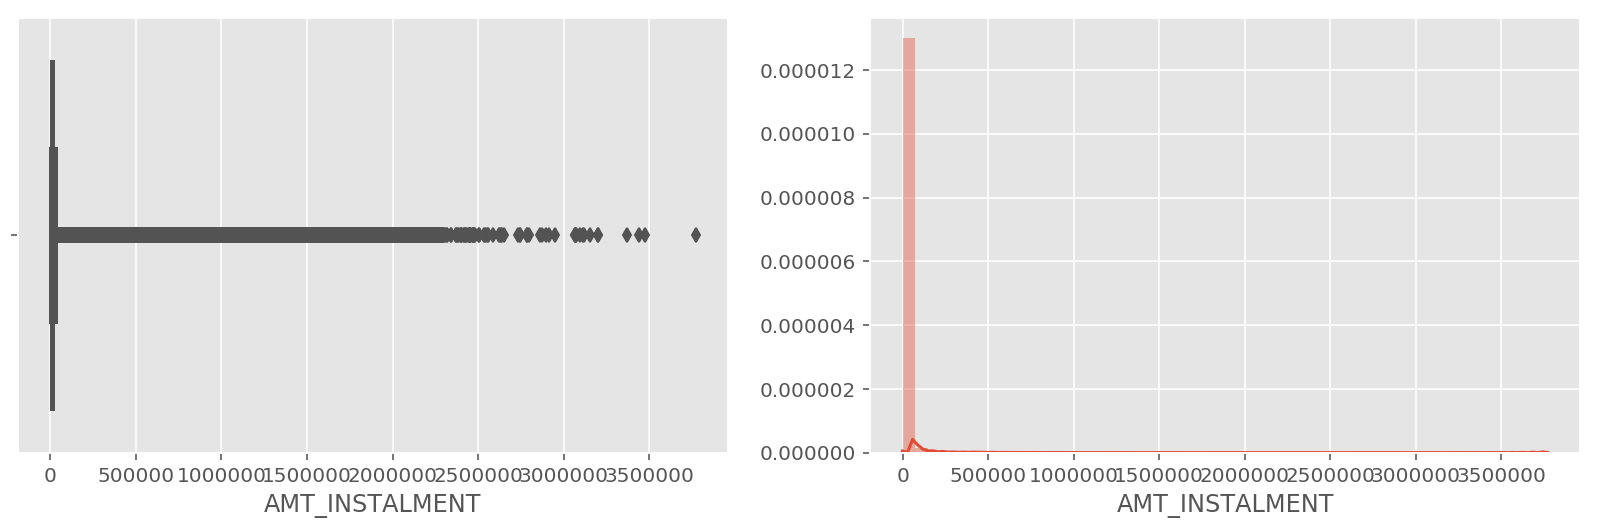

AMT_PAYMENT: 

What the client actually paid on previous credit on this installment

Table: ['installments_payments.csv']

Missing values:
Total      2905.000000
Percent       0.021352
Name: AMT_PAYMENT, dtype: float64

count    1.360250e+07
mean     1.723822e+04
std      5.473578e+04
min      0.000000e+00
25%      3.398265e+03
50%      8.125515e+03
75%      1.610842e+04
max      3.771488e+06
Name: AMT_PAYMENT, dtype: float64


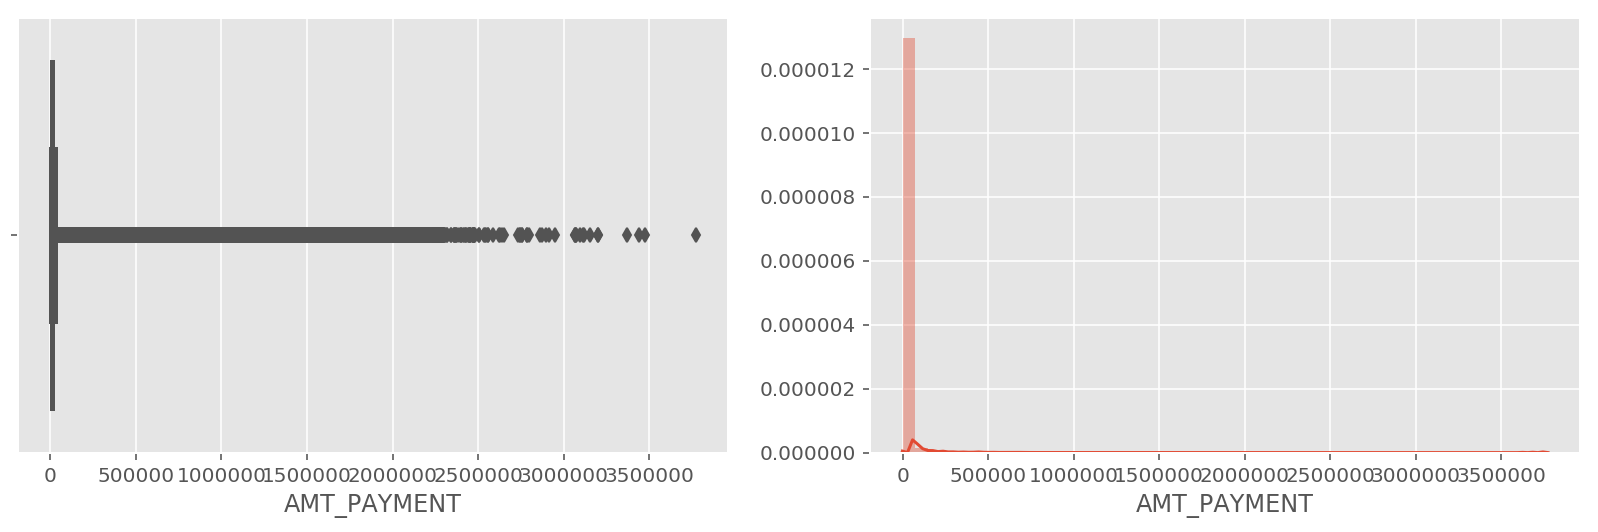

In [93]:
installments_payments = pd.read_csv('data/installments_payments.csv.zip')
installments_payments.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1, inplace=True)
wrap_func(installments_payments)

                          Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
DAYS_CREDIT_UPDATE            0   0.000000
CREDIT_TYPE                   0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
float64    8
int64      4
object     3
dtype: int64
DAYS_CREDIT: 

How many days before current application did client apply for Credit Bureau credit

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_CREDIT, dtype: float64

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64


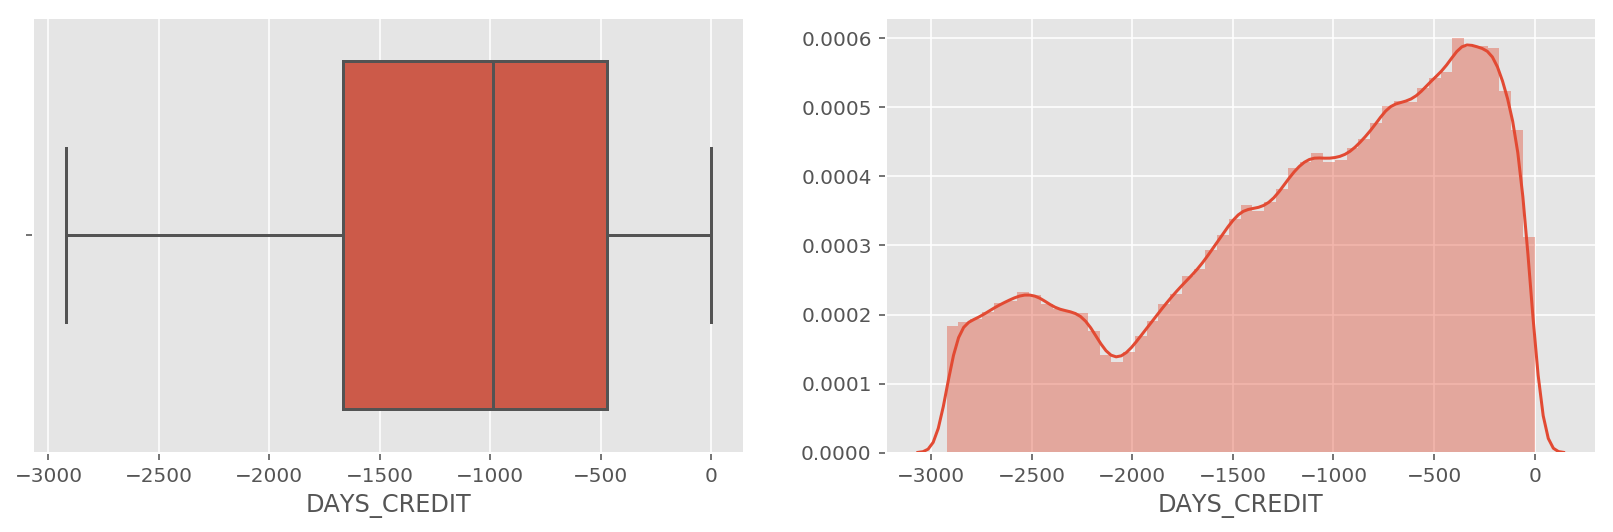

CREDIT_DAY_OVERDUE: 

Number of days past due on CB credit at the time of application for related loan in our sample

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CREDIT_DAY_OVERDUE, dtype: float64

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64


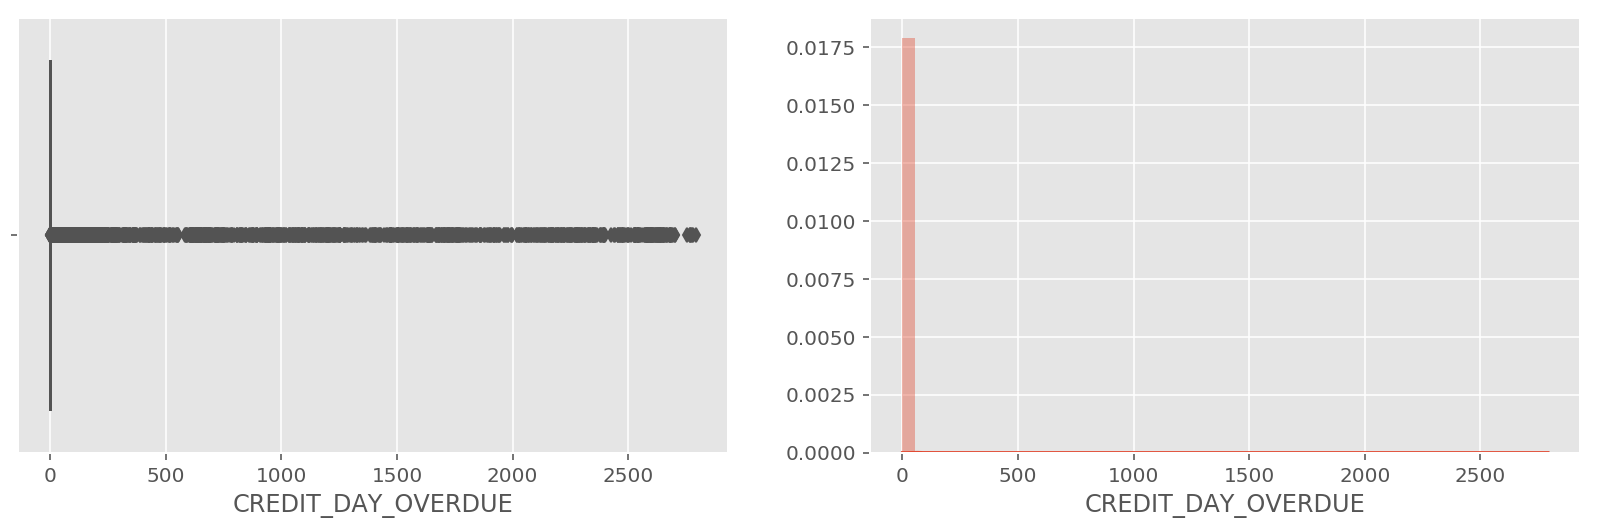

DAYS_CREDIT_ENDDATE: 

Remaining duration of CB credit (in days) at the time of application in Home Credit

Table: ['bureau.csv']

Missing values:
Total      105553.000000
Percent         6.149573
Name: DAYS_CREDIT_ENDDATE, dtype: float64

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64


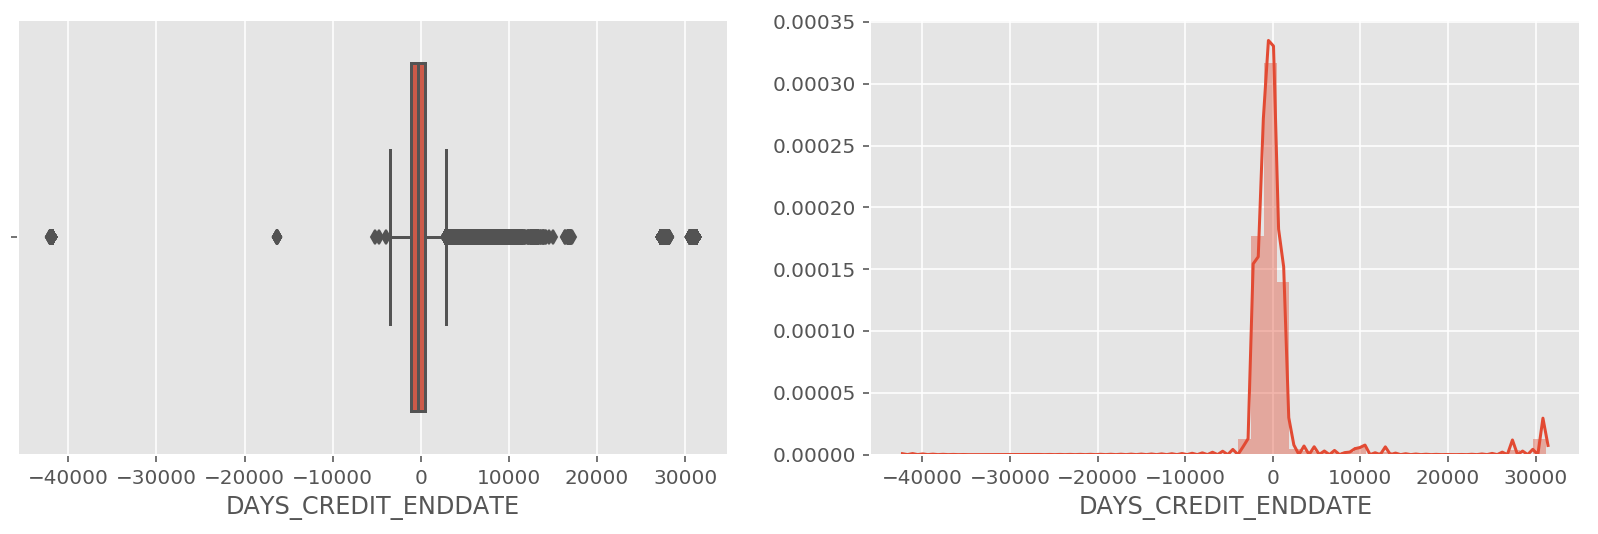

DAYS_ENDDATE_FACT: 

Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Table: ['bureau.csv']

Missing values:
Total      633653.000000
Percent        36.916958
Name: DAYS_ENDDATE_FACT, dtype: float64

count    1.082775e+06
mean    -1.017437e+03
std      7.140106e+02
min     -4.202300e+04
25%     -1.489000e+03
50%     -8.970000e+02
75%     -4.250000e+02
max      0.000000e+00
Name: DAYS_ENDDATE_FACT, dtype: float64


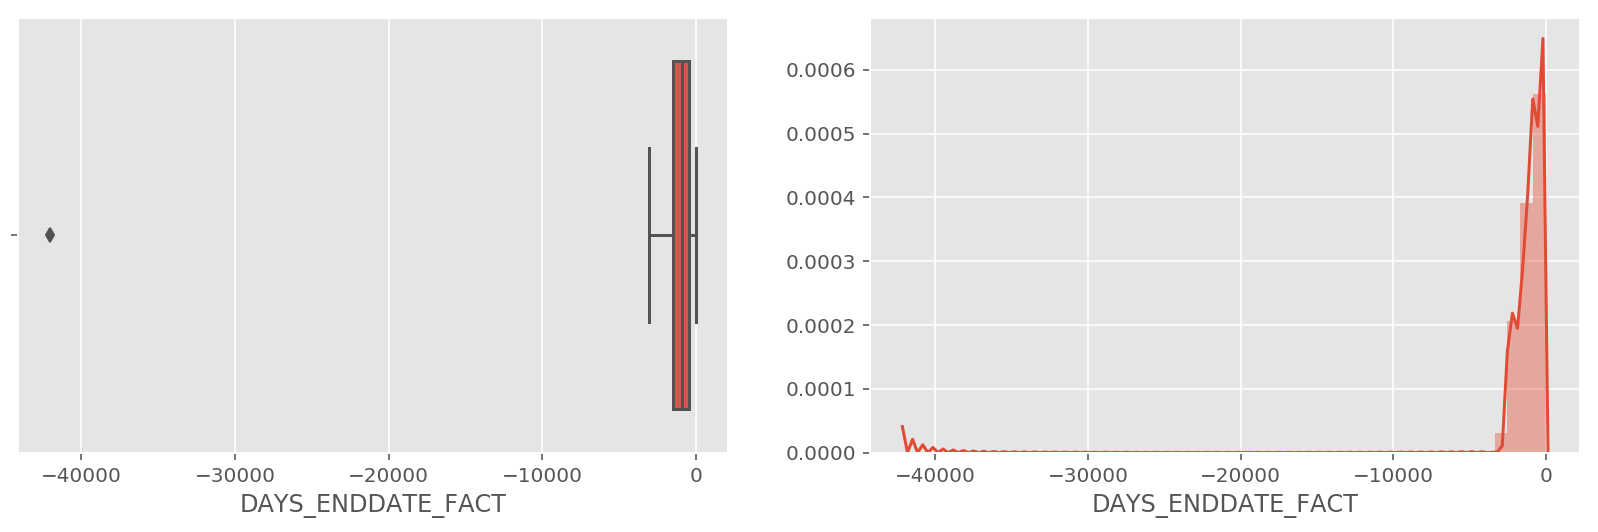

AMT_CREDIT_MAX_OVERDUE: 

Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

Table: ['bureau.csv']

Missing values:
Total      1.124488e+06
Percent    6.551326e+01
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64


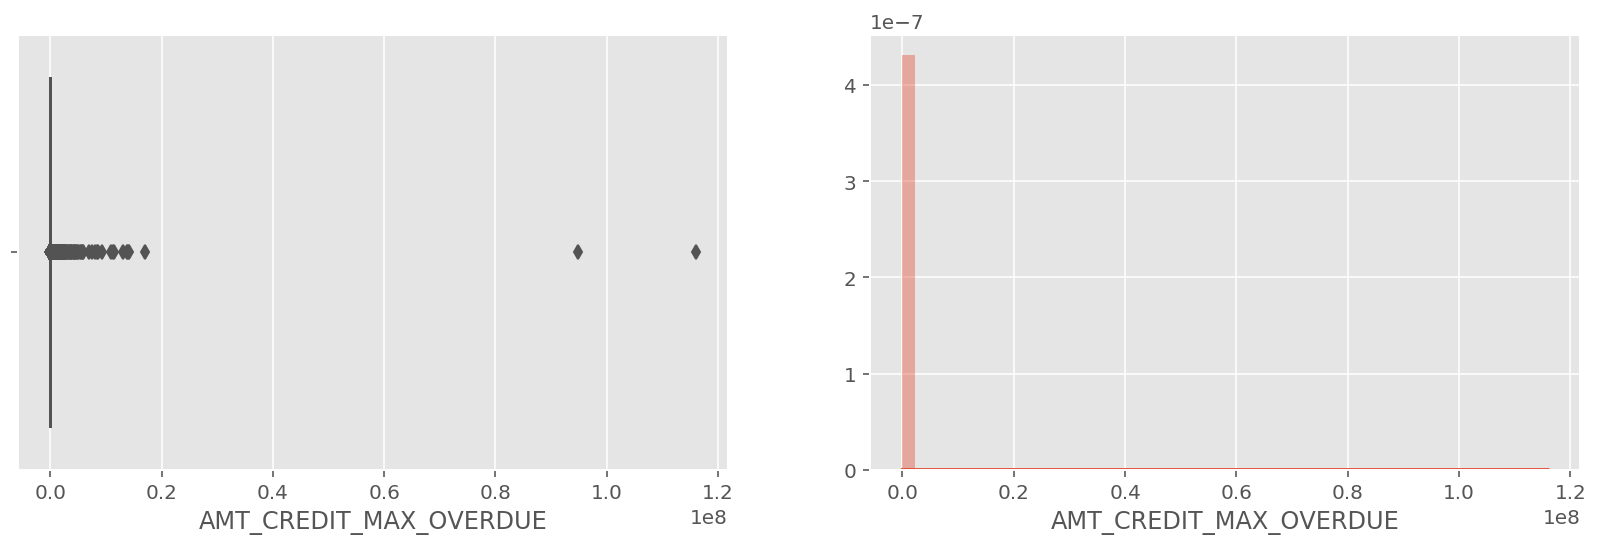

AMT_CREDIT_SUM: 

Current credit amount for the Credit Bureau credit

Table: ['bureau.csv']

Missing values:
Total      13.000000
Percent     0.000757
Name: AMT_CREDIT_SUM, dtype: float64

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64


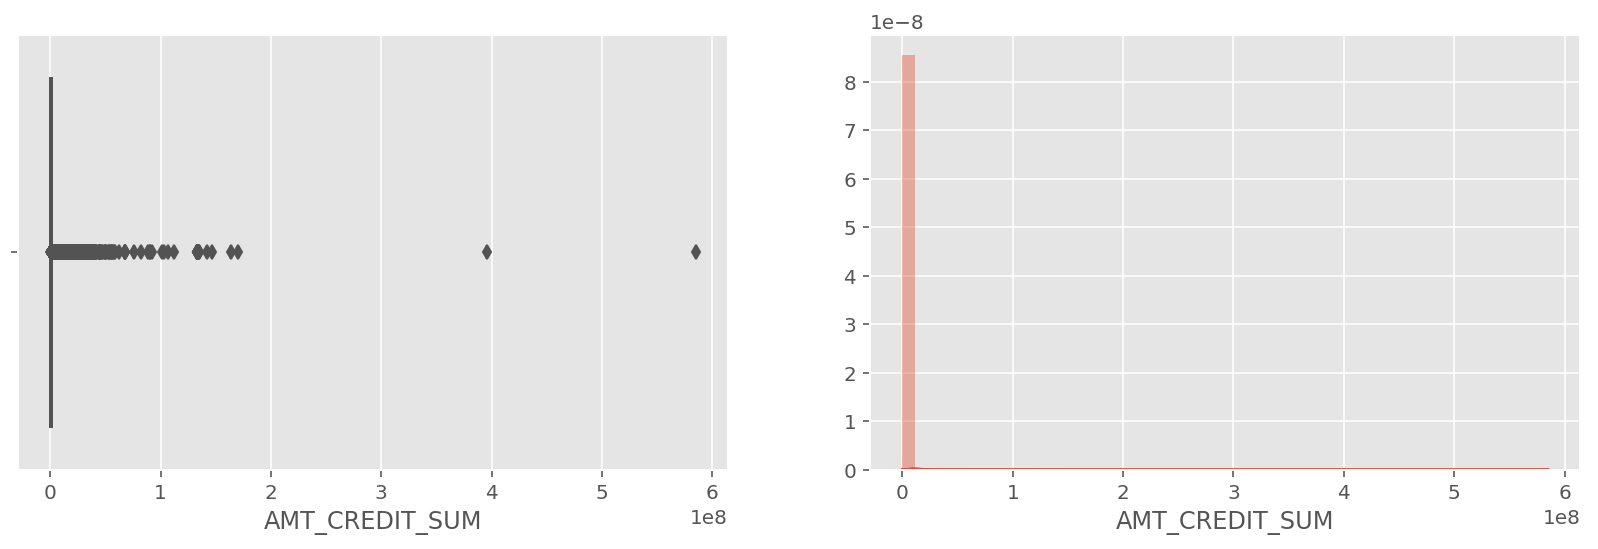

AMT_CREDIT_SUM_DEBT: 

Current debt on Credit Bureau credit

Table: ['bureau.csv']

Missing values:
Total      257669.000000
Percent        15.011932
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

count    1.458759e+06
mean     1.370851e+05
std      6.774011e+05
min     -4.705600e+06
25%      0.000000e+00
50%      0.000000e+00
75%      4.015350e+04
max      1.701000e+08
Name: AMT_CREDIT_SUM_DEBT, dtype: float64


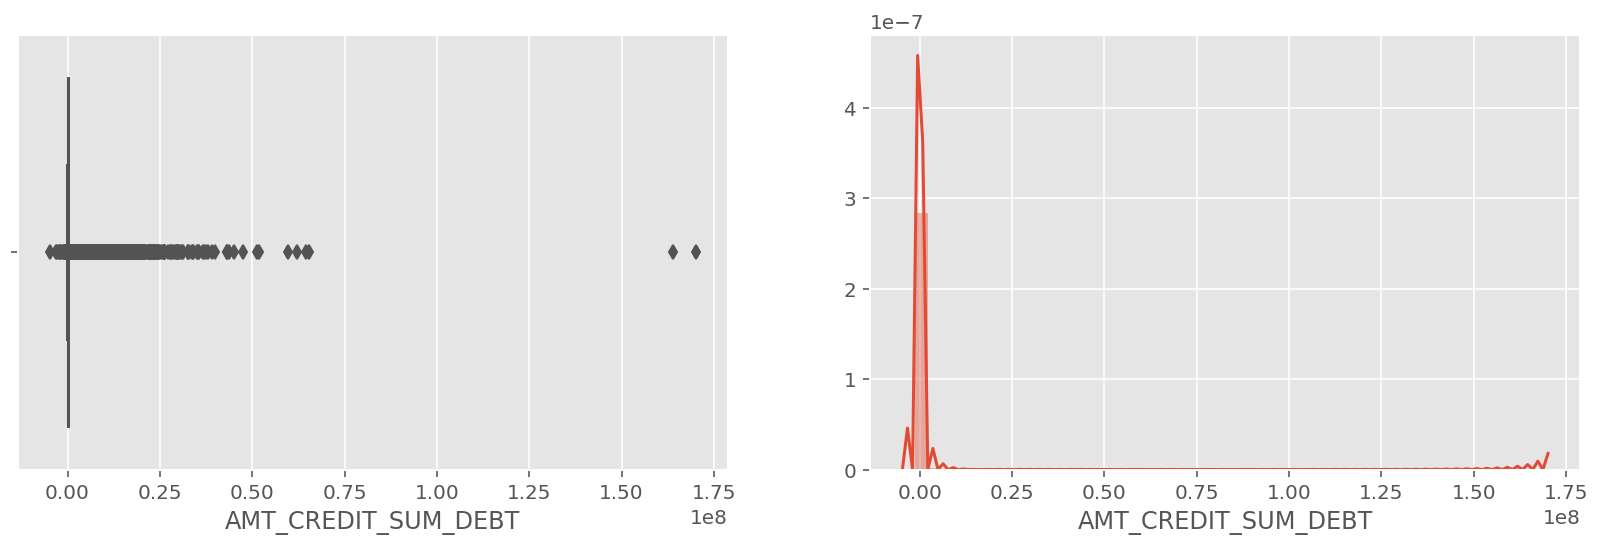

AMT_CREDIT_SUM_LIMIT: 

Current credit limit of credit card reported in Credit Bureau

Table: ['bureau.csv']

Missing values:
Total      591780.000000
Percent        34.477415
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

count    1.124648e+06
mean     6.229515e+03
std      4.503203e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64


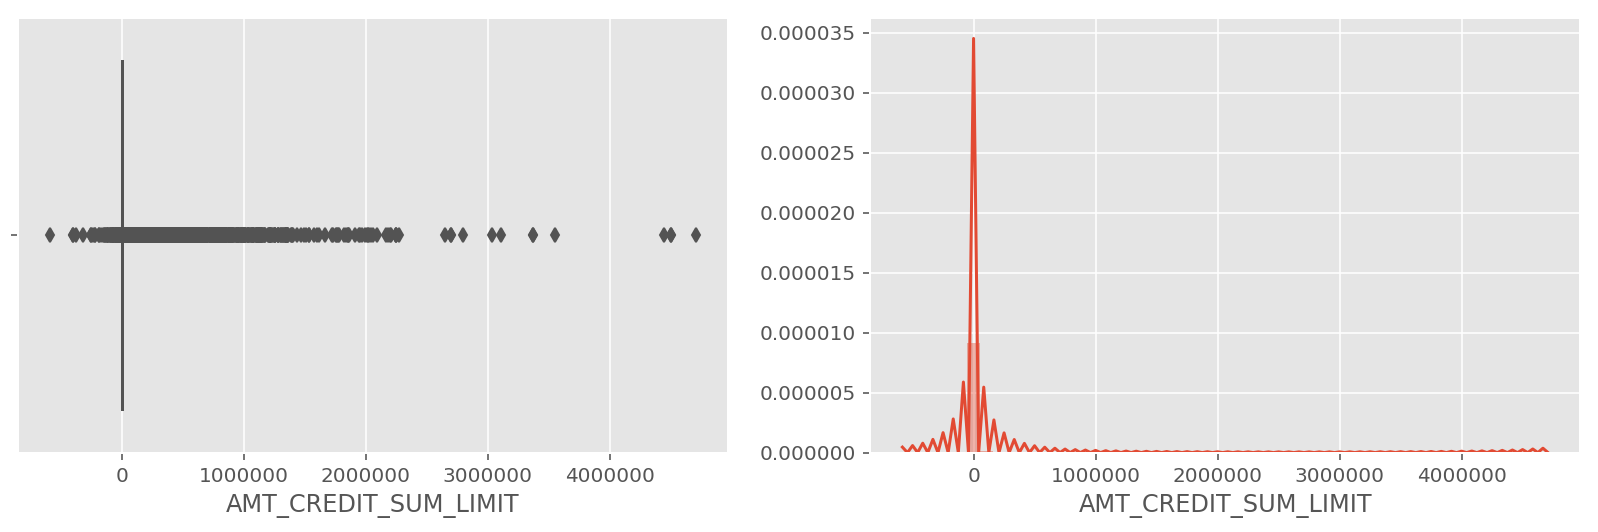

AMT_CREDIT_SUM_OVERDUE: 

Current amount overdue on Credit Bureau credit

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64


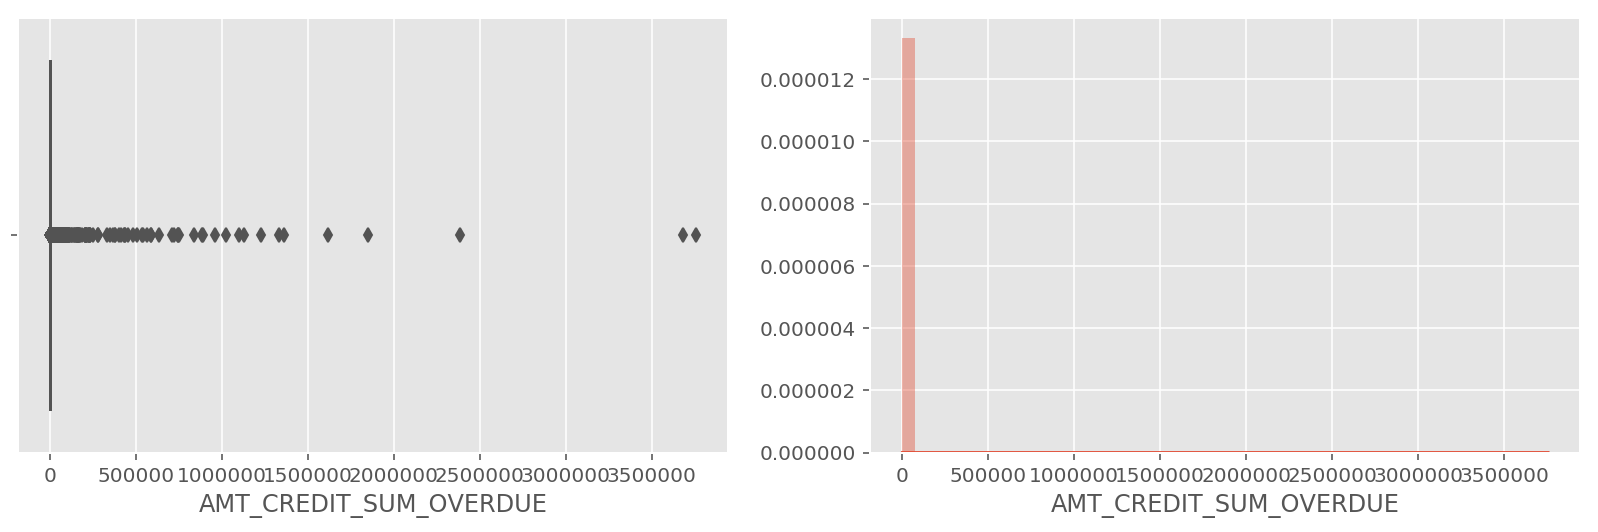

DAYS_CREDIT_UPDATE: 

How many days before loan application did last information about the Credit Bureau credit come

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_CREDIT_UPDATE, dtype: float64

count    1.716428e+06
mean    -5.937483e+02
std      7.207473e+02
min     -4.194700e+04
25%     -9.080000e+02
50%     -3.950000e+02
75%     -3.300000e+01
max      3.720000e+02
Name: DAYS_CREDIT_UPDATE, dtype: float64


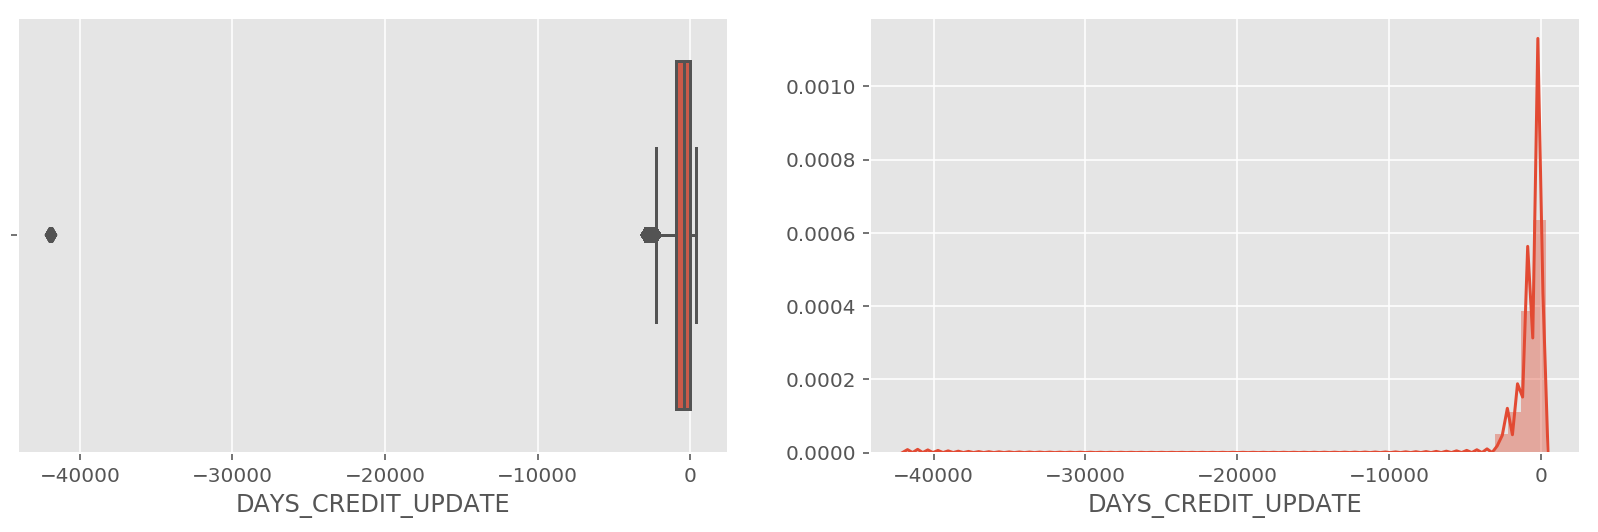

AMT_ANNUITY: 

Loan annuity

Annuity of the Credit Bureau credit

Annuity of previous application

Table: ['application_{train|test}.csv' 'bureau.csv' 'previous_application.csv']

Missing values:
Total      1.226791e+06
Percent    7.147349e+01
Name: AMT_ANNUITY, dtype: float64

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64


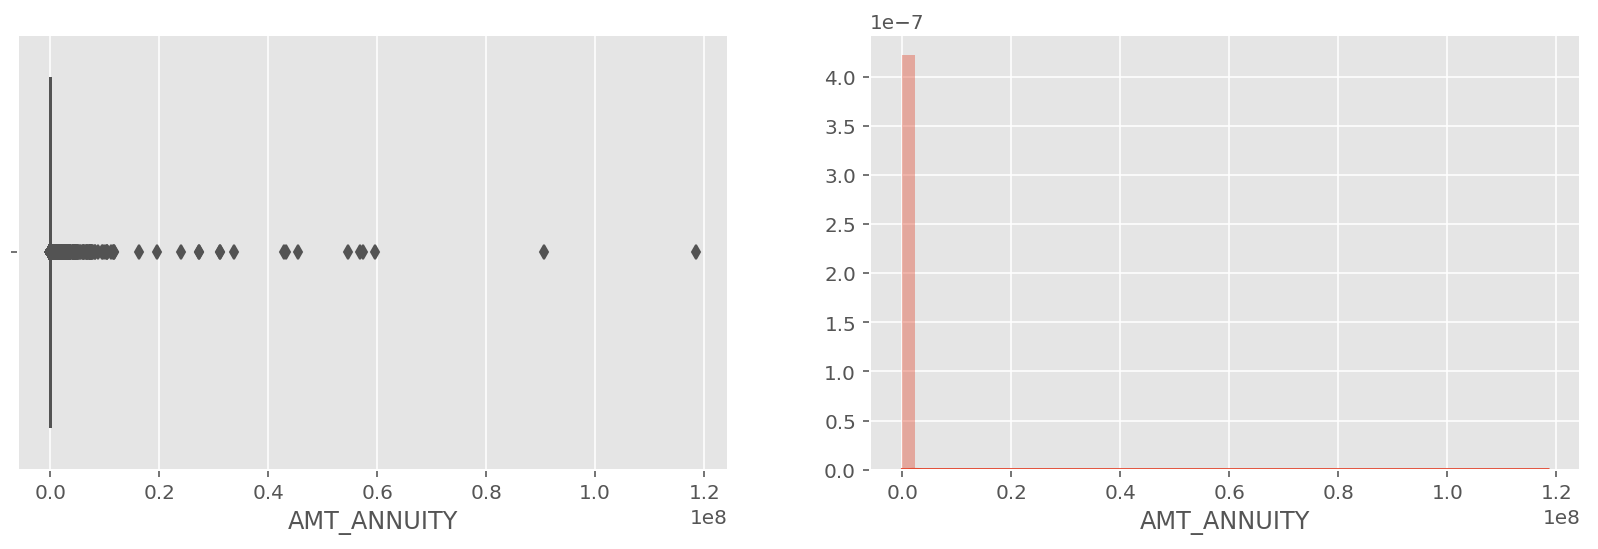

CREDIT_ACTIVE: 

Status of the Credit Bureau (CB) reported credits

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CREDIT_ACTIVE, dtype: float64

           Percent    Total
Closed    0.628790  1079273
Active    0.367395   630607
Sold      0.003803     6527
Bad debt  0.000012       21


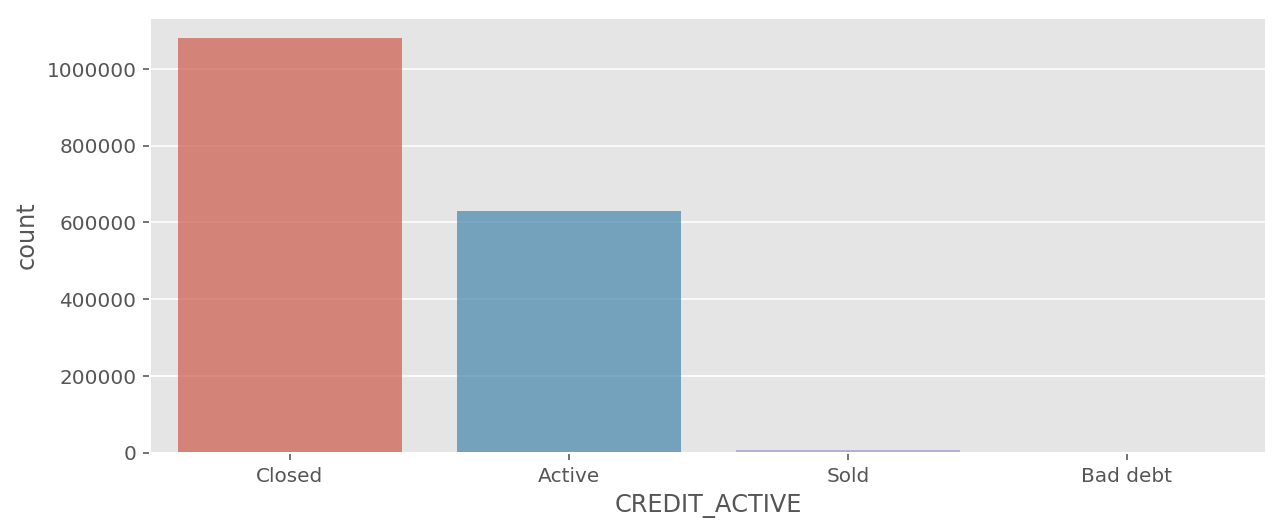

CNT_CREDIT_PROLONG: 

How many times was the Credit Bureau credit prolonged

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CNT_CREDIT_PROLONG, dtype: float64

        Percent    Total
0  9.946901e-01  1707314
1  4.439452e-03     7620
2  7.119436e-04     1222
3  1.112776e-04      191
4  3.146068e-05       54
5  1.223471e-05       21
9  1.165211e-06        2
6  1.165211e-06        2
8  5.826053e-07        1
7  5.826053e-07        1


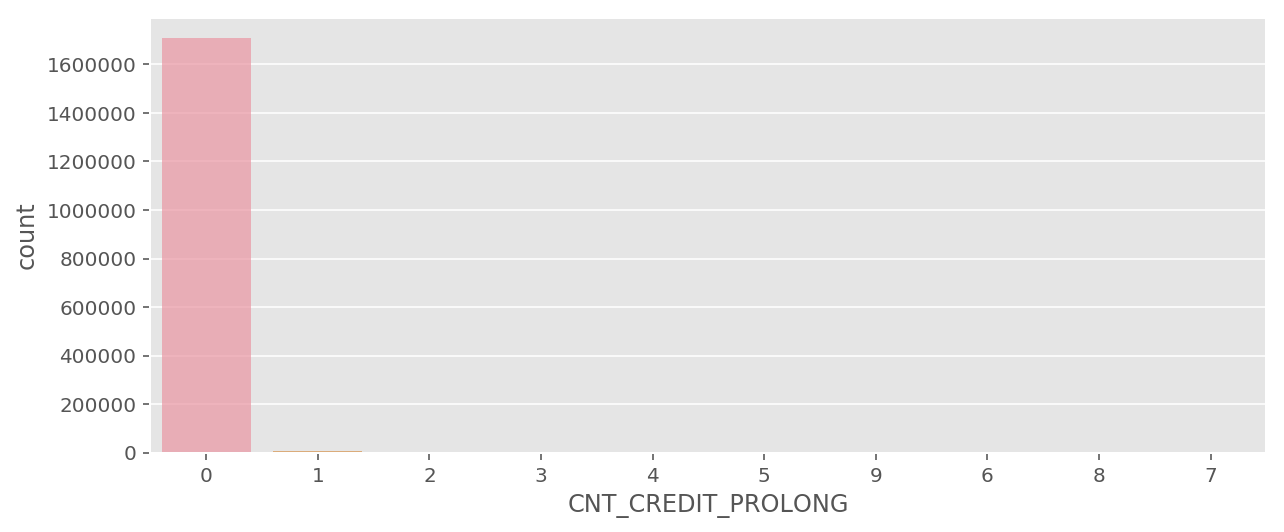

CREDIT_TYPE: 

Type of Credit Bureau credit (Car, cash,...)

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CREDIT_TYPE, dtype: float64

                                                   Percent    Total
Consumer credit                               7.291975e-01  1251615
Credit card                                   2.343209e-01   402195
Car loan                                      1.613234e-02    27690
Mortgage                                      1.071469e-02    18391
Microloan                                     7.231879e-03    12413
Loan for business development                 1.150645e-03     1975
Another type of loan                          5.925096e-04     1017
Unknown type of loan                          3.233459e-04      555
Loan for working capital replenishment        2.732419e-04      469
Cash loan (non-earmarked)                     3.262590e-05       56
Real estate loan                              1.573034e-05       27
Loan for the purcha

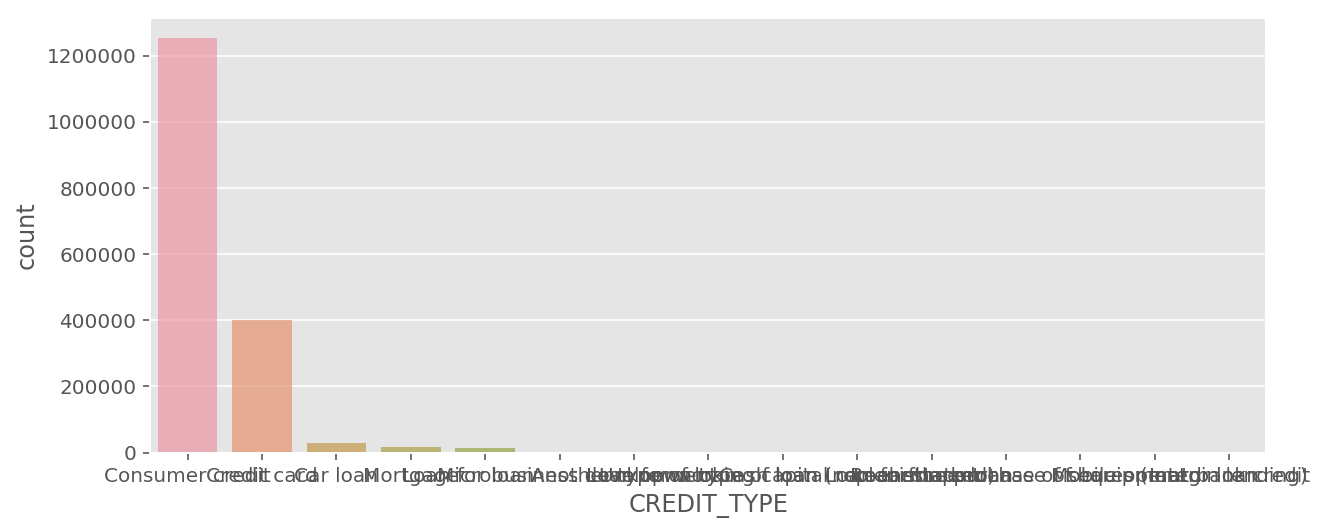

CREDIT_CURRENCY: 

Recoded currency of the Credit Bureau credit

Table: ['bureau.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CREDIT_CURRENCY, dtype: float64

             Percent    Total
currency 1  0.999180  1715020
currency 2  0.000713     1224
currency 3  0.000101      174
currency 4  0.000006       10


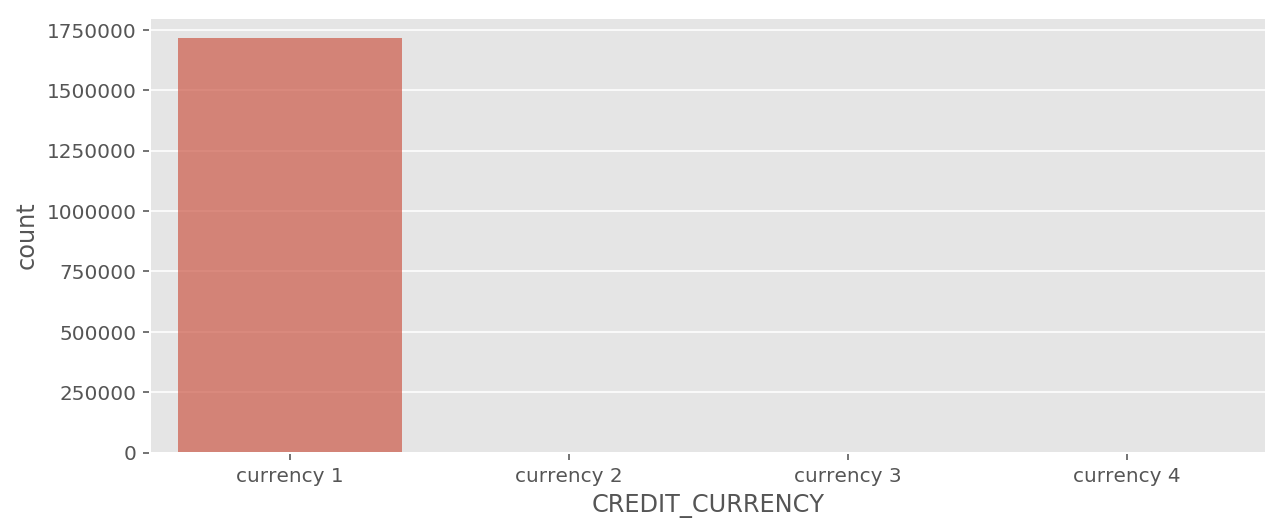

In [89]:
bureau = pd.read_csv('data/bureau.csv.zip')
bureau.drop(['SK_ID_CURR','SK_ID_BUREAU'], inplace=True, axis=1)
wrap_func(bureau)

                       Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_DPD_DEF                 0  0.000000
SK_DPD                     0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
MONTHS_BALANCE             0  0.000000
int64      3
float64    2
object     1
dtype: int64
MONTHS_BALANCE: 

Month of balance relative to application date (-1 means the freshest balance date)

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

Month of balance relative to application date (-1 means the freshest balance date)

Table: ['bureau_balance.csv' 'POS_CASH_balance.csv' 'credit_card_balance.csv']

Missing values:
Total      0.0
Percent    0.0
Name: MONTHS_BALANCE, dtype: float64

count    1.000136e+07
mean    -3.501259e+01
std      2.606657e+01
min

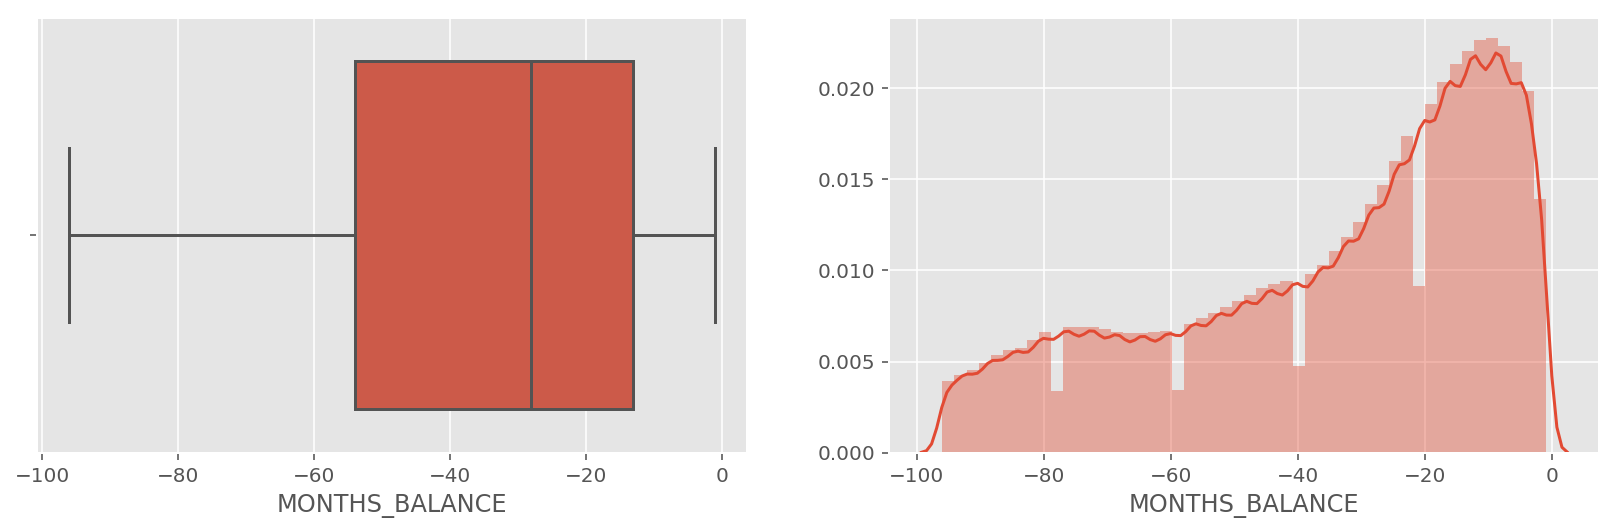

CNT_INSTALMENT: 

Term of previous credit (can change over time)

Table: ['POS_CASH_balance.csv']

Missing values:
Total      26071.000000
Percent        0.260675
Name: CNT_INSTALMENT, dtype: float64

count    9.975287e+06
mean     1.708965e+01
std      1.199506e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      9.200000e+01
Name: CNT_INSTALMENT, dtype: float64


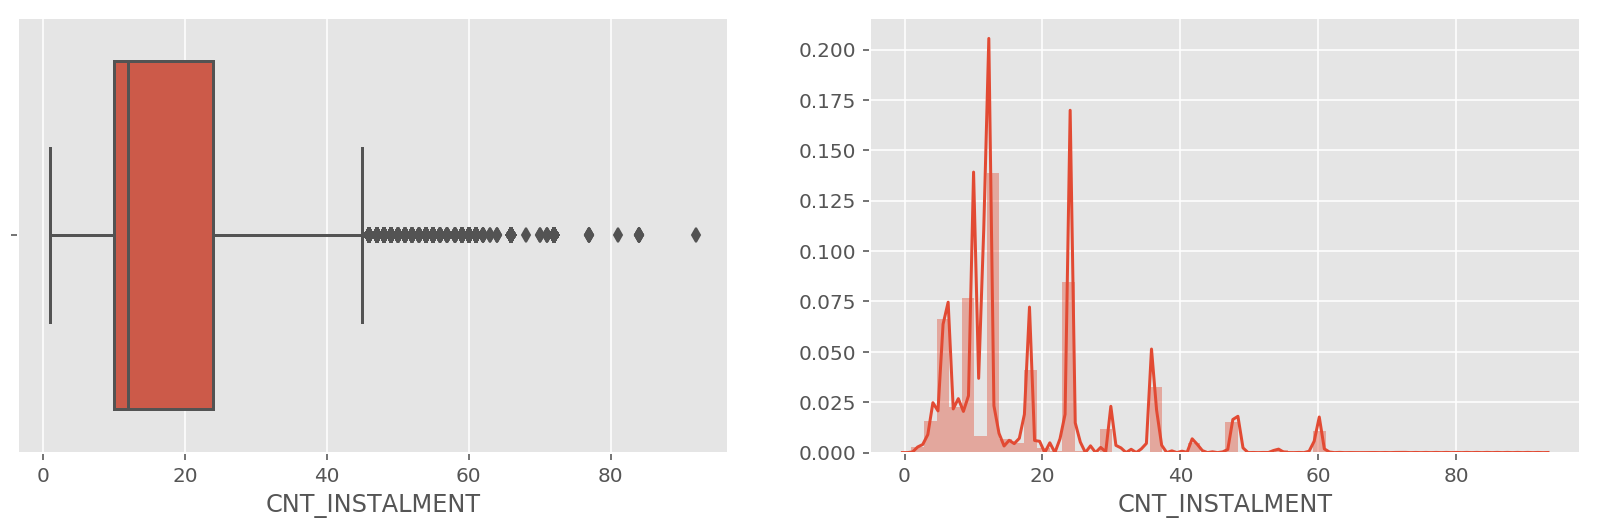

CNT_INSTALMENT_FUTURE: 

Installments left to pay on the previous credit

Table: ['POS_CASH_balance.csv']

Missing values:
Total      26087.000000
Percent        0.260835
Name: CNT_INSTALMENT_FUTURE, dtype: float64

count    9.975271e+06
mean     1.048384e+01
std      1.110906e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      8.500000e+01
Name: CNT_INSTALMENT_FUTURE, dtype: float64


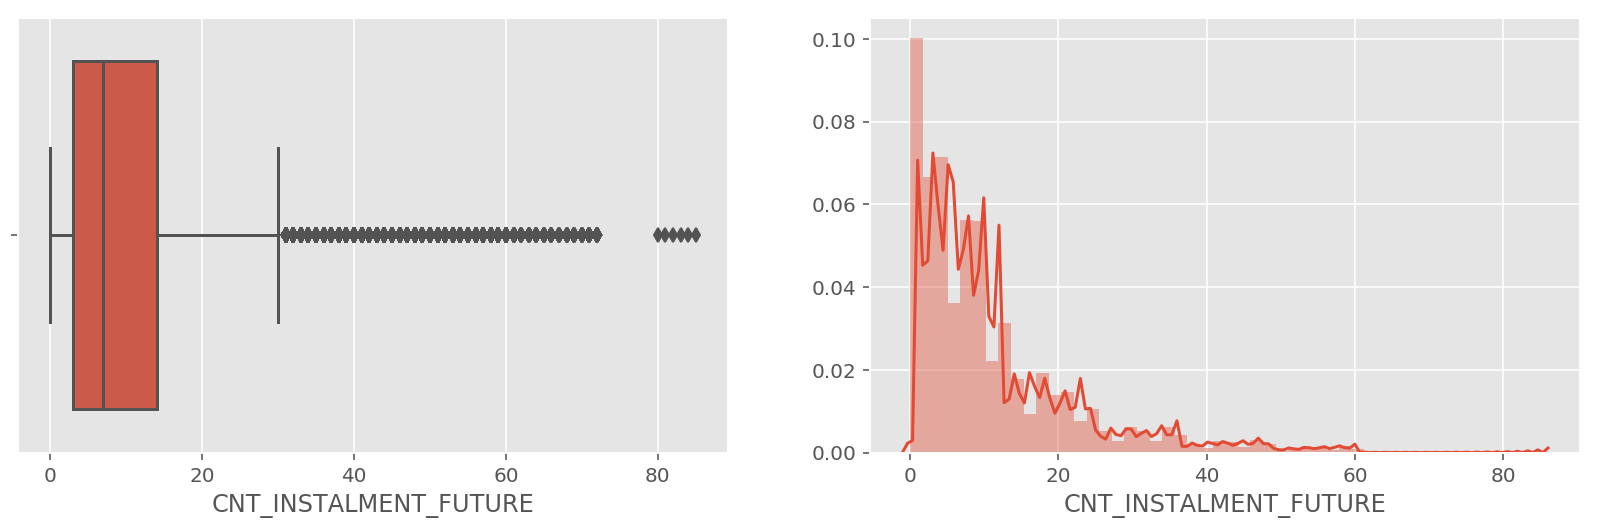

SK_DPD: 

DPD (days past due) during the month of previous credit

DPD (Days past due) during the month on the previous credit

Table: ['POS_CASH_balance.csv' 'credit_card_balance.csv']

Missing values:
Total      0.0
Percent    0.0
Name: SK_DPD, dtype: float64

count    1.000136e+07
mean     1.160693e+01
std      1.327140e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.231000e+03
Name: SK_DPD, dtype: float64


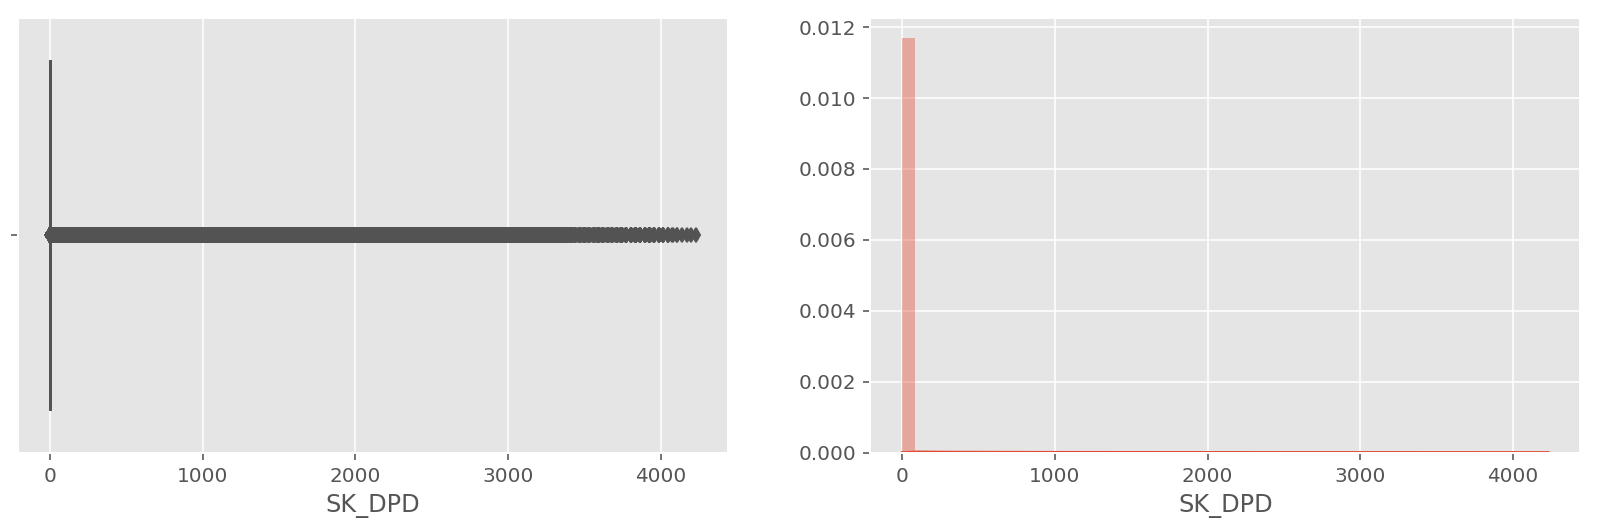

SK_DPD_DEF: 

DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

Table: ['POS_CASH_balance.csv' 'credit_card_balance.csv']

Missing values:
Total      0.0
Percent    0.0
Name: SK_DPD_DEF, dtype: float64

count    1.000136e+07
mean     6.544684e-01
std      3.276249e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.595000e+03
Name: SK_DPD_DEF, dtype: float64


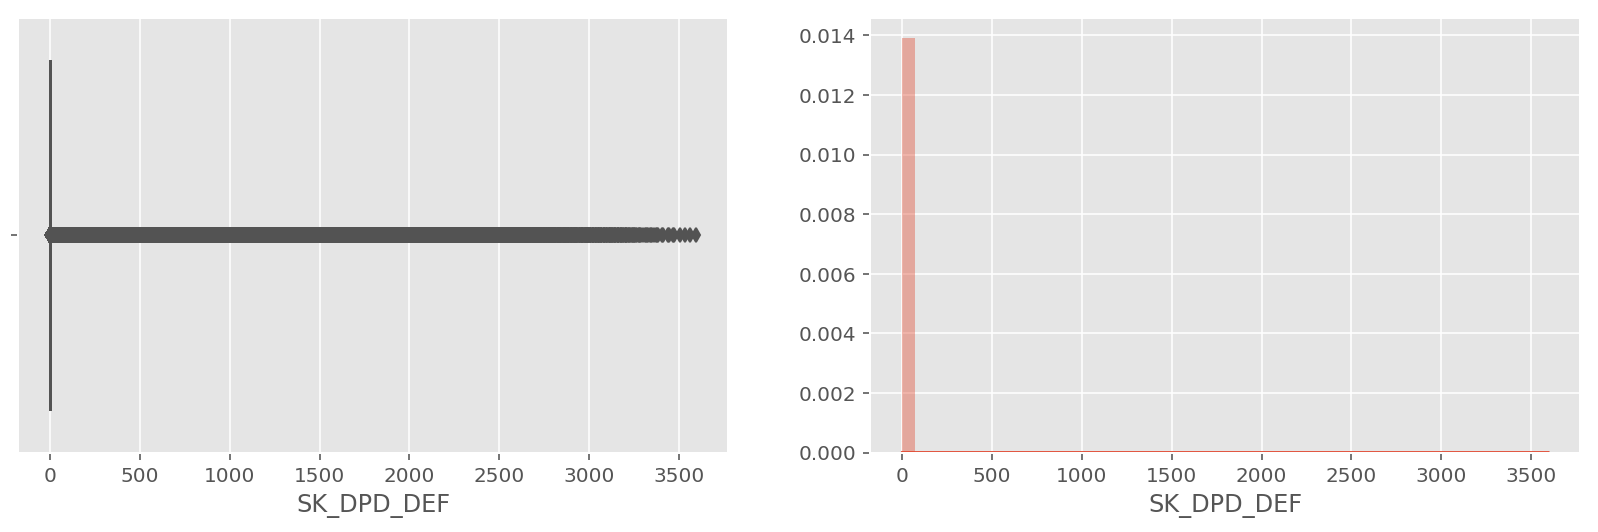

NAME_CONTRACT_STATUS: 

Contract status during the month

Contract status (active signed,...) on the previous credit

Contract status (approved, cancelled, ...) of previous application

Table: ['POS_CASH_balance.csv' 'credit_card_balance.csv'
 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CONTRACT_STATUS, dtype: float64

                            Percent    Total
Active                 9.149876e-01  9151119
Completed              7.447819e-02   744883
Signed                 8.724815e-03    87260
Demand                 7.064041e-04     7065
Returned to the store  5.460258e-04     5461
Approved               4.916332e-04     4917
Amortized debt         6.359136e-05      636
Canceled               1.499796e-06       15
XNA                    1.999728e-07        2


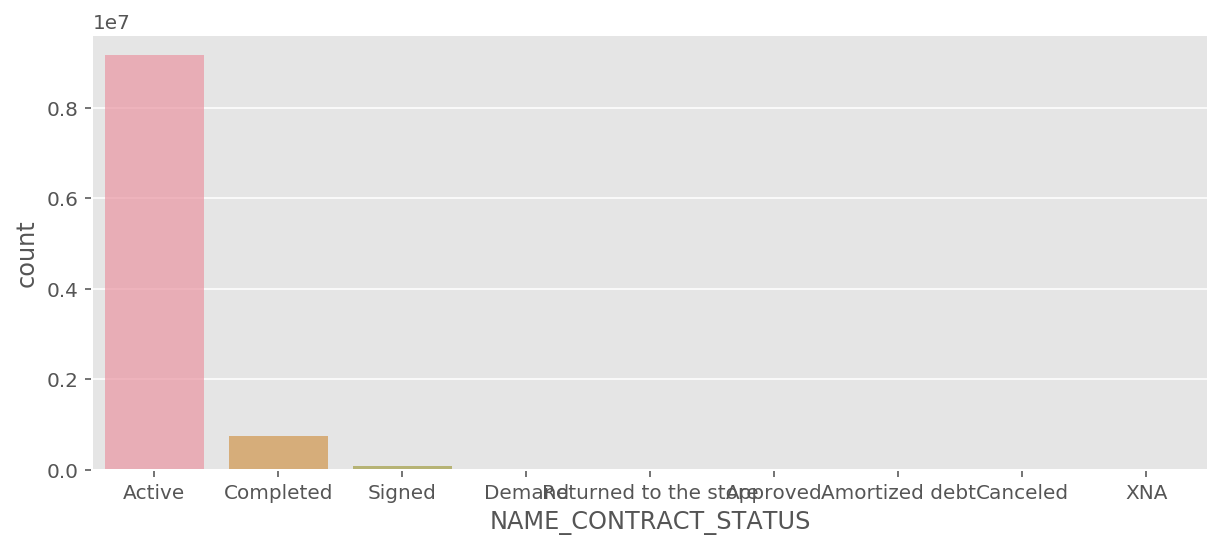

In [91]:
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv.zip')
POS_CASH_balance.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1, inplace=True)
wrap_func(POS_CASH_balance)